In [10]:
#MODE
folder = 'DIS'

In [3]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import decimal
import time
from sklearn.metrics import auc
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator, AutoMinorLocator
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap, BoundaryNorm

In this section, I'm analysing the energies of the NO identified pions, here I'm plotting:
    -True energy of the pions with and without the pion mass (139 MeV)
    -Comparison between PiE of identified and unidentified
    -Histogram heatmap of the pion energies
    -Neutrino eneryg spectrum and comparison with detected.
    -Theta
    -Alpha-Vertex position
    -And comparisons

In [4]:
code_lists = {
    'TotDIS': 717495,
    'RecDIS': 131230,
    'TotQE': 20233,
    'RecQE': 3478,
    'TotRes': 654008,
    'RecRes': 171466,
    'TotMEC': 1432,
    'RecMEC': 160,
}

#automatize the extraction of info of the txt files
def read_file(folder, filename):
    with open(f"{folder}/{filename}.txt", "r") as file:
        reader = csv.reader(file, delimiter=' ')
        return [row for row in reader]

def read_file2(folder, filename):
    with open(f"{folder}/{filename}.txt", "r") as file:
        reader = csv.reader(file, delimiter=' ')
        # Skip the first and last element in each row
        return [row[1:-1] for row in reader]
    
def autobins(data, min_value=None, max_value=None, bin_method='freedman-diaconis'):
    if min_value is None:
        min_value = np.min(data)
    if max_value is None:
        max_value = np.max(data)
    
    # Calculate interquartile range (IQR)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bin width using Freedman-Diaconis rule
    bin_width = 2 * IQR * len(data) ** (-1/3)

    # Calculate number of bins
    num_bins = int((max_value - min_value) / bin_width)
    
    # Calculate bin size
    bin_size = (max_value - min_value) / num_bins
    
    bin_edges = np.arange(min_value, max_value, bin_size) 
    
    return bin_edges

def numbins(data, min_value=None, max_value=None, bin_method='freedman-diaconis'):
    if min_value is None:
        min_value = np.min(data)
    if max_value is None:
        max_value = np.max(data)
    
    # Calculate interquartile range (IQR)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bin width using Freedman-Diaconis rule
    bin_width = 2 * IQR * len(data) ** (-1/3)

    # Calculate number of bins
    num_bins = int((max_value - min_value) / bin_width) 
    
    return num_bins

def set_plot_style(labels=None, loc='best'):
    # Automatically set the number of major ticks
    plt.gca().xaxis.set_major_locator(AutoLocator())
    plt.gca().yaxis.set_major_locator(AutoLocator())

    # Automatically set the number of minor ticks
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

    # Change the length of the tick marks
    plt.tick_params(axis='both', which='major', length=30, width=2, direction='in', top=True, right=True)  # Adjust the length as needed
    plt.tick_params(axis='both', which='minor', length=7, width=1.2,direction='in', top=True, right=True)  # Minor ticks

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

    # Change the width of the frame surrounding the plot
    for spine in plt.gca().spines.values():
        spine.set_linewidth(2)  # Adjust the linewidth as needed

    # Move the axes inside the plot
    ax = plt.gca()
    ax.spines['top'].set_position(('outward', 0))
    ax.spines['right'].set_position(('outward', 0))
    ax.spines['left'].set_position(('outward', 0))
    ax.spines['bottom'].set_position(('outward', 0))

    # Adjust the position of the ticks
    ax.tick_params(axis='x', direction='in', length=15, width=2)
    ax.tick_params(axis='y', direction='in', length=15, width=2)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # Add NOνA Simulation text inside the plot square at the title position
    plt.text(1.0, 1.1, fr'NOvA Simulation', fontsize=25, color='gray', ha='right', va='top', transform=plt.gca().transAxes)

    # Create custom legend handles if labels are provided
    if labels is not None:
        handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)]
        plt.legend(handles=handles, labels=labels, fontsize=20, loc=loc)
        
def set_sn():
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().yaxis.get_offset_text().set_visible(False)

    # Define custom formatter for y-axis ticks
    def custom_formatter(x, pos):
        coeff, exponent = '{:.2e}'.format(x).split('e')
        if float(coeff) == 0:
            return r'$0$'
        else:
            return r'${:.0f}$'.format(float(coeff))

    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
    y_max = plt.ylim()[1]
    num_digits = len(str(abs(int(y_max))))
    exponent = int(num_digits)

    plt.ylim(0,y_max+(0.03*y_max))

    y_limits = plt.ylim()
    upper_limit = y_limits[1]

    plt.text(1, upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')
    
def set_sn2():
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().yaxis.get_offset_text().set_visible(False)

    # max_value = max(energylost)
    max_value = plt.ylim()[1]
    factor = 10 ** (len(str(int(max_value))) - 1)

    # Define custom formatter for y-axis ticks
    def custom_formatter(x, pos):
        return r'${:.1f}$'.format(x / factor)


    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
    y_max = plt.ylim()[1]
    num_digits = len(str(abs(int(y_max))))
    exponent = int(num_digits)-1

    plt.ylim(0,y_max+(0.03*y_max))

    y_limits = plt.ylim()
    upper_limit = y_limits[1]
    
    xlim = plt.xlim()
#     plt.text(xlim[0], upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')
    plt.text(0, upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')
    
def set_sn3():
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().yaxis.get_offset_text().set_visible(False)

    # max_value = max(energylost)
    max_value = plt.ylim()[1]
    factor = 10 ** (len(str(int(max_value))) - 1)

    # Define custom formatter for y-axis ticks
    def custom_formatter(x, pos):
        return r'${:.1f}$'.format(x / factor)


    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
    y_max = plt.ylim()[1]
    num_digits = len(str(abs(int(y_max))))
    exponent = int(num_digits)-1

    plt.ylim(0,y_max+(0.03*y_max))

    y_limits = plt.ylim()
    upper_limit = y_limits[1]
    
    xlim = plt.xlim()
#     plt.text(xlim[0], upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')
    plt.text(1, upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')

In [ ]:
start_time = time.time()

LpdgNT = read_file(folder, 'pdgntvars_total')
LpdgReco = read_file(folder, 'pdgpngvars_total')
LtrkIDNT = read_file(folder, 'trkNTvars_total')
LtrkIDReco = read_file(folder, 'trkvars_total')
Lrun = read_file(folder, 'runvars_total')
LnumpivtxNT = read_file(folder, 'numpivtxvarsNT_total')
LeALLNT = read_file(folder, 'energiesALLvarsNT_total')
Lnue = read_file(folder, 'nuevarsNT_total')
LthetaNT = read_file(folder, 'thetavarsNT_total')
LalphaNT = read_file(folder, 'alphavarsNT_total')
LvisENT = read_file(folder, 'visenergiesALLvarsNT_total')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [ ]:
#----------------------------- PART 2------------------------------------
i=0
#NOW LETS CHECK THE PIONS THAT WEREN'T IDENTIFIED IN THE RECO
start_time = time.time()

totalnumberofNTpions = 0
totalnumberofNORecopions = 0 

energiesNT = []
visenergiesNT= []
runinfo = []
theta = []
alpha = []
vtxpos = []
numpiNT = []
numpiNoReco = []
numpiReco = []
nue = []
energies_perevent_nonpion = []
pdgs_perevent_nonpion = []

allpdgNT=[]

#iterates over all the rows of events
for j, event in enumerate(LpdgNT):
    #ignoring first and last
    #event = event[1:-1]
    #to save the info of trk id in every event
    mm=1
    numpievent = 0
    trkIDlist = []
    energyNTlist = []
    visenergyNTlist = []
    thetalist = []
    alphalist = []
    vtxposlist = []
    numpiNTlist = []
    for k, element in enumerate(event):
        #check if in the k-event, are pions and save their trkID
        if element == "211" or element == "-211":
            mm = mm + 3
            #count
            numpievent = numpievent + 1 
            totalnumberofNTpions=totalnumberofNTpions+1
            #store track id of pion
            trkIDlist.append(LtrkIDNT[j][k])
            #save true energies of pions
            energyNTlist.append(LeALLNT[j][k])
            #save true visible energies of pions
            visenergyNTlist.append(LvisENT[j][k])
            #save the theta info
            thetalist.append(LthetaNT[j][numpievent])
            #save the alpha angle
            #saving the lepton info and then the pion info
            
            if len(alphalist) == 0:
                #lepinfo
                alphalist.append(LalphaNT[j][1])
                alphalist.append(LalphaNT[j][2])
                alphalist.append(LalphaNT[j][3])
            #pioninfo
            if len(alphalist) == 3*numpievent:
                alphalist.append(LalphaNT[j][mm])
                alphalist.append(LalphaNT[j][mm+1])
                alphalist.append(LalphaNT[j][mm+2]) 
            
            #save vtx position once 
            if numpievent == 1:
                vtxposlist.append(LnumpivtxNT[j][2])
                vtxposlist.append(LnumpivtxNT[j][3])
                vtxposlist.append(LnumpivtxNT[j][4])
    
    numpiNTlist.append(str(numpievent))
    
    nNoReco = 0
    nReco = 0
    #is the list empty?
    if len(trkIDlist) !=0:
        #Define temporal list 
        temp_energies = []
        temp_visenergies = []
        temp_runinfo =[]
        temp_theta = []
        temp_alpha = []
        temp_vtxpos = []
        temp_nue = []
        temp_energies_perevent_nonpion = []
        temp_pdgs_perevent_nonpion = []
        temp_allpdgNT=[]
        nn=-4
        #check the trkIDNT elements (pions) that are not showing up in the reco trkId list
        for z, elemtrkNT in enumerate(trkIDlist):
            nn=nn+2
            #and check is that element is no in the reco list
            if elemtrkNT not in LtrkIDReco[j]:
                #If is not, take the NuTruth info
                #count it
                nNoReco = nNoReco +1
                totalnumberofNORecopions=totalnumberofNORecopions+1
                position=trkIDlist.index(elemtrkNT)
                #save the energy
                temp_energies.append(energyNTlist[position])
                temp_visenergies.append(visenergyNTlist[position])
                #save the neutirno energy
                if len(temp_nue) == 0:
                    temp_nue.append(Lnue[j][1])
                #Save the runinfo and the trkID
                if len(temp_runinfo) == 0:
                    temp_runinfo.append(Lrun[j][0])
                    temp_runinfo.append(Lrun[j][1])
                    temp_runinfo.append(Lrun[j][2])
                    temp_runinfo.append(Lrun[j][3])
                    temp_runinfo.append(Lrun[j][4])
                #temp_runinfo.append(elemtrkNT)
                #save the angle
                temp_theta.append(thetalist[position])
                #save the alpha angle
                
                if len(temp_alpha) == 0:
                    #lepinfo
                    temp_alpha.append(alphalist[0])
                    temp_alpha.append(alphalist[1])
                    temp_alpha.append(alphalist[2])
                #then save the corresponding pion info
                temp_alpha.append(alphalist[position+3])
                temp_alpha.append(alphalist[position+4])
                temp_alpha.append(alphalist[position+5])
                #save the vertex position
    
                if len(temp_vtxpos) == 0:
                    temp_vtxpos.append(vtxposlist[0])
                    temp_vtxpos.append(vtxposlist[1])
                    temp_vtxpos.append(vtxposlist[2])
            if elemtrkNT in LtrkIDReco[j]:
                nReco = nReco + 1
            
        if len(temp_energies) != 0:
            #save here the pdg, calenergie and cvn of the particles different from pions in the event 
            if len(temp_energies_perevent_nonpion) == 0:
                for h, evnt in enumerate(LpdgNT[j]):
                    if evnt != '211' and evnt != '-211':
                        temp_energies_perevent_nonpion.append(LeALLNT[j][h])
                        temp_pdgs_perevent_nonpion.append(LpdgNT[j][h])
                #also save all the information about the true and reco pdgs
                for q, eve in enumerate(LpdgNT[j]):
                    temp_allpdgNT.append(LpdgNT[j][q])
            energies_perevent_nonpion.append(temp_energies_perevent_nonpion)
            pdgs_perevent_nonpion.append(temp_pdgs_perevent_nonpion)
            energiesNT.append(temp_energies)
            visenergiesNT.append(temp_visenergies)   
            nue.append(temp_nue)
            runinfo.append(temp_runinfo)
            theta.append(temp_theta)
            alpha.append(temp_alpha)
            vtxpos.append(temp_vtxpos)
            numpiNT.append(numpiNTlist)
            allpdgNT.append(temp_allpdgNT)
            numpiReco.append(str(nReco))
            numpiNoReco.append(str(nNoReco))
            numpiNT.append(str(numpievent))
                    
    #if(i>1000):
    #    break
    #i=i+1
    
#print(vtxpos)
print(totalnumberofNTpions)
print(totalnumberofNORecopions)
#print(cvns)
#print(runinfo)

with open(f'{folder}/analysisfiles/energiesnt_perevent_nonpion_part2.txt', 'w') as file:
    for state in energies_perevent_nonpion:
        file.write(' '.join(map(str, state)) + '\n')
        
with open(f'{folder}/analysisfiles/pdgs_perevent_nonpion_part2.txt', 'w') as file:
    for state in pdgs_perevent_nonpion:
        file.write(' '.join(map(str, state)) + '\n')

with open(f'{folder}/analysisfiles/energiesNT_part2.txt', 'w') as file:
    for state in energiesNT:
        file.write(' '.join(map(str, state)) + '\n')
        
with open(f'{folder}/analysisfiles/visenergiesNT_part2.txt', 'w') as file:
    for state in visenergiesNT:
        file.write(' '.join(map(str, state)) + '\n')
        
with open(f'{folder}/analysisfiles/nue_part2.txt', 'w') as file:
    for state in nue:
        file.write(' '.join(map(str, state)) + '\n')
        
with open(f'{folder}/analysisfiles/runinfo_part2.txt', 'w') as file:
    for state in runinfo:
        file.write(' '.join(map(str, state)) + '\n')
        
with open(f'{folder}/analysisfiles/theta_part2.txt', 'w') as file:
    for state in theta:
        file.write(' '.join(map(str, state)) + '\n')
        
with open(f'{folder}/analysisfiles/alpha_part2.txt', 'w') as file:
    for state in alpha:
        file.write(' '.join(map(str, state)) + '\n')
        
with open(f'{folder}/analysisfiles/vtxpos_part2.txt', 'w') as file:
    for state in vtxpos:
        file.write(' '.join(map(str, state)) + '\n')
        
with open(f'{folder}/analysisfiles/numpiNT_part2.txt', 'w') as file:
    for state in numpiNT:
        file.write(' '.join(map(str, state)) + '\n')
        
with open(f'{folder}/analysisfiles/numpiReco_part2.txt', 'w') as file:
    for state in numpiReco:
        file.write(' '.join(map(str, state)) + '\n')
        
with open(f'{folder}/analysisfiles/numpiNoReco_part2.txt', 'w') as file:
    for state in numpiNoReco:
        file.write(' '.join(map(str, state)) + '\n')

with open(f'{folder}/analysisfiles/allpdgNT_part2.txt', 'w') as file:
    for state in allpdgNT:
        file.write(' '.join(map(str, state)) + '\n')
        
with open(f'{folder}/analysisfiles/numpiNT_part2.txt', 'w') as file:
    for state in numpiNT:
        file.write(' '.join(map(str, state)) + '\n')

        
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [4]:
#Checking the energy distribution
start_time = time.time()
%store -r epiNT
%store -r epiNTshift
temp=[]
epiNT_part2=[]
epiNTshift_part2=[]
temp=read_file(folder, 'analysisfiles/energiesNT_part2')
epiNT_part2 = [float(element) for sublist in temp for element in sublist]
epiNTshift_part2 = [float(element)-0.139 for sublist in temp for element in sublist]
        
        
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.7931180000305176 seconds


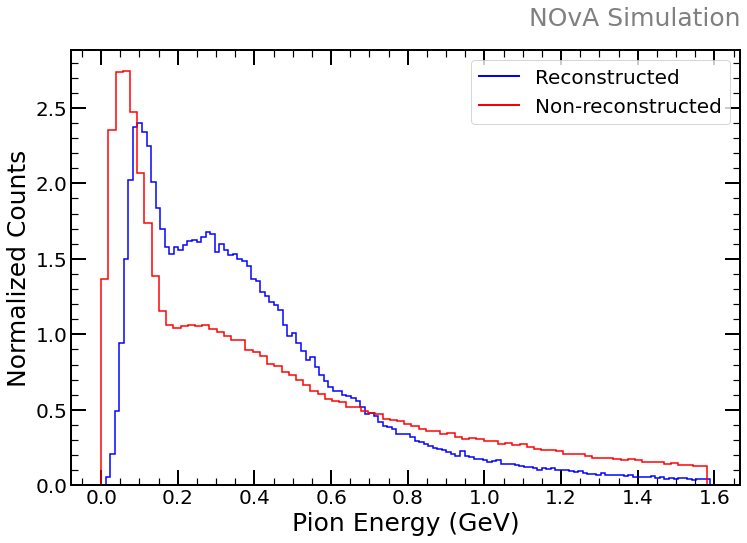

In [5]:
# Calculate histograms
hist_nt, _ = np.histogram(epiNTshift, bins=autobins(epiNTshift,0,1.6), density=True)
hist_nt_part2, _ = np.histogram(epiNTshift_part2, bins=autobins(epiNTshift_part2,0,1.6), density=True)

# Plot both normalized histograms on the same plot
plt.figure(figsize=(12, 8)) 

# Plot truth energy histogram
plt.hist(epiNTshift, bins=autobins(epiNTshift,0,1.6), edgecolor='blue', linewidth=1.5, histtype='step', label='Reconstruted pions', density=True)

# Plot reco energy histogram
plt.hist(epiNTshift_part2, bins=autobins(epiNTshift_part2,0,1.6), edgecolor='red', linewidth=1.5, histtype='step', label='Unreconstructed pions', density=True)

plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
# plt.title('Comparison True Reco and No-Reco Pion Energies', fontsize=30)
set_plot_style(['Reconstructed', 'Non-reconstructed'])

plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/energyshift_comparison_part1_part2_{folder}.png', bbox_inches='tight')
plt.savefig(f"{folder}/analysisfiles/images/energyshift_comparison_part1_part2_{folder}.png", bbox_inches='tight')
plt.show()

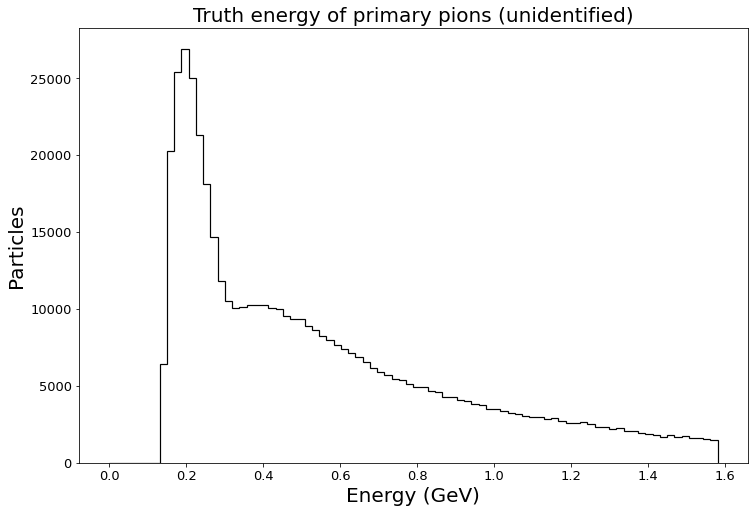

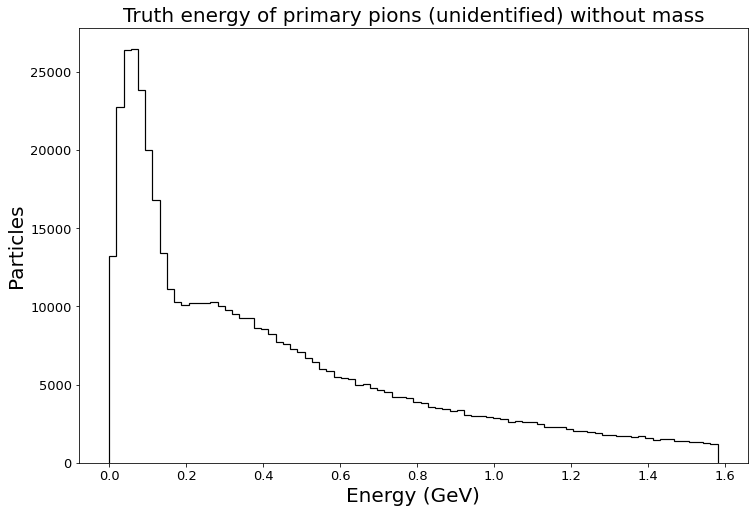

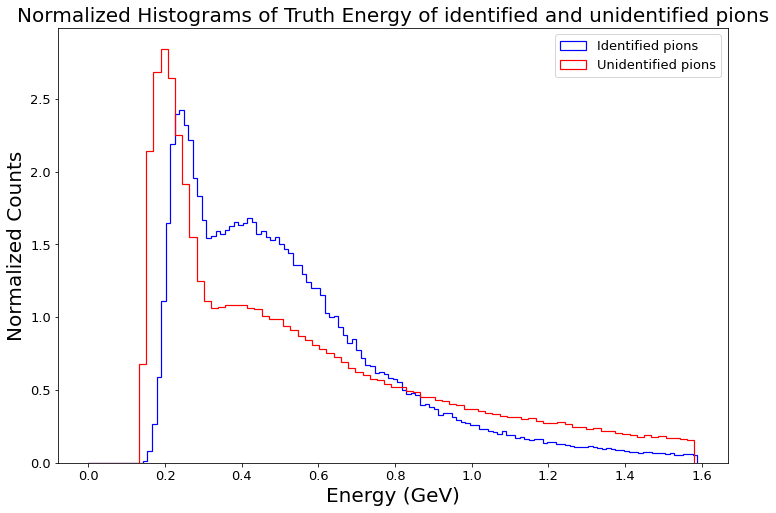

In [6]:
#TRUTH ENERGY OF PRIM PIONS
#bin_size = 0.025
#bin_edges = np.arange(0, 1.6, bin_size) 

plt.figure(figsize=(12, 8)) 
plt.hist(epiNT_part2, bins=autobins(epiNT_part2,0,1.6), edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('Energy (GeV)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title(f'Truth energy of primary pions (unidentified)', fontsize=20)
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
#plt.yscale('log')
plt.savefig(f"{folder}/analysisfiles/images/energyNT_part2.png")
plt.show()

#Truth energy of pions without the mass
plt.figure(figsize=(12, 8)) 
plt.hist(epiNTshift_part2, bins=autobins(epiNTshift_part2,0,1.6), edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('Energy (GeV)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title(f'Truth energy of primary pions (unidentified) without mass', fontsize=20)
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
#plt.yscale('log')
plt.savefig(f"{folder}/analysisfiles/images/energyNT_shifted_part2.png")
plt.show()

%store -r epiNT
%store -r epiNTshift


# Define histogram parameters
#bin_size = 0.025
#bin_edges = np.arange(0, 1.6, bin_size) 

# Calculate histograms
hist_nt, _ = np.histogram(epiNT, bins=autobins(epiNT,0,1.6), density=True)
hist_nt_part2, _ = np.histogram(epiNT_part2, bins=autobins(epiNT_part2,0,1.6), density=True)

# Plot both normalized histograms on the same plot
plt.figure(figsize=(12, 8)) 

# Plot truth energy histogram
plt.hist(epiNT, bins=autobins(epiNT,0,1.6), edgecolor='blue', linewidth=1.2, histtype='step', label='Identified pions', density=True)

# Plot reco energy histogram
plt.hist(epiNT_part2, bins=autobins(epiNT_part2,0,1.6), edgecolor='red', linewidth=1.2, histtype='step', label='Unidentified pions', density=True)

plt.xlabel('Energy (GeV)', fontsize=20)
plt.ylabel('Normalized Counts', fontsize=20)
plt.title('Normalized Histograms of Truth Energy of identified and unidentified pions', fontsize=20)
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.savefig(f"{folder}/analysisfiles/images/energy_comparison_part1_part2.png")
plt.show()



In [7]:
folder='Res'

In [11]:
#EXTRACTING THE PION ENERGY FOR THE EVENTS WITH DETECTED PIONS
start_time = time.time()

temp=[]
temp=read_file(folder, 'analysisfiles/energiesNT_part2')

epis = [[] for _ in range(7)]

for event in temp:
    l = len(event)
    if l < len(epis):
        sum=0
        for i in range(l):
            sum=sum+float(event[i])-0.139
        epis[l].append(sum)


end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.9135937690734863 seconds


In [12]:
#filling all the lists with equal number of data to normalize it.
elements=[]
for i, lists in enumerate(epis):
    elements.append(len(epis[i]))
    
import random
maxim=len(epis[1])
for i, lists in enumerate(epis):
    if len(lists) != 0:
        if len(lists) < maxim:
            n = maxim - len(lists)
            for _ in range(n):
                epis[i].append(random.uniform(2,3))

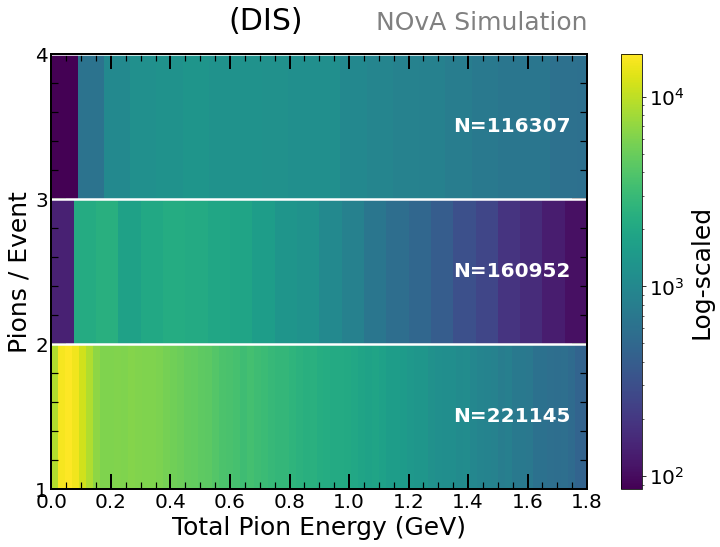

In [13]:
#heatmap with normalization global
# Define x bins
#x_bins = np.linspace(0, 1.5, 100)
from matplotlib.colors import LogNorm
xstart=0
xend=3

bbins = []

bbins.append(np.linspace(xstart, xend, 100))
bbins.append(np.linspace(xstart, xend, numbins(epis[1],0, 3)))
bbins.append(np.linspace(xstart, xend, numbins(epis[2],0, 1.8)))
bbins.append(np.linspace(xstart, xend, numbins(epis[3],0, 0.7)))
# bbins.append(np.linspace(xstart, xend, numbins(epis[4],0, 0.1)))
# print(len(bbins[1]))
# print(lens[1])
# print(len(bbins[2]))
# print(lens[2])
# print(len(bbins[3]))
# print(lens[3])
# print(len(bbins[4]))
# print(lens[4])
# for i in range(len(episnt)):
#     if i==0:
#         bbins.append(np.linspace(xstart, xend, 100))
#     else:
#         bbins.append(np.linspace(xstart, xend, numbins(episnt[i],0, 1.6)))

# Define y values
y_values = [0.5, 1.5, 2.5,3.5,4.5]

# Define number of pions per event
num_pions_per_event = [len(epi) for epi in epis]

plt.figure(figsize=(12,8)) 

# Plot each histogram
for i, (epi, y_value, num_pions, bbin) in enumerate(zip(epis, y_values, num_pions_per_event, bbins), start=1):
    plt.hist2d(epi, np.zeros_like(epi)+y_value, bins=[bbin, 1], cmap='viridis',norm=LogNorm())
#     if i > 1:
#         cbar = plt.colorbar()
    if i!=1:
        plt.text(1.35, y_value, f'N={(elements[i-1])*(i-1)}', color='white', fontsize=20, ha='left', va='center', fontweight='bold')

#         plt.text(1.35, y_value, f'N={lens[i-1]}', color='white', fontsize=20, ha='left', va='center', fontweight='bold')

colorbar= plt.colorbar(label='Log-scaled')
colorbar.ax.yaxis.label.set_fontsize(25) 
colorbar.ax.tick_params(labelsize=20)
# Add NOνA Simulation text inside the plot square at the title position
#plt.text(1.0, 1.05, 'NOvA Simulation', fontsize=30, color='gray', ha='right', va='top', transform=plt.gca().transAxes)

#change the number of ticks in the y axis

#plt.tick_params(axis='both', which='major', length=20, width=1.5, direction='in')
set_plot_style()
plt.locator_params(axis='y', nbins=4)
#plt.colorbar(label='Frequency')
plt.xlabel('Total Pion Energy (GeV)', fontsize=25)
plt.ylabel('Pions / Event',fontsize=25)
plt.ylim(1, 4)
plt.xlim(0,1.8)
# plt.title(f'Reconstructed',x=0.3, y=1.03,fontsize=30)
# plt.title(f'ND',x=0.4, y=1.03,fontsize=30)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.axhline(y=2, color='white', linewidth=2.5)
plt.axhline(y=3, color='white', linewidth=2.5)
plt.axhline(y=4, color='white', linewidth=2.5)
plt.title(f'({folder})',x=0.4,y=1.042,fontsize=30)
# Add the image
# image_path = 'novastyle.png'  # Specify the path to your image file
# plt.figimage(plt.imread(image_path), 350, 515, alpha=1)
# plt.text(1.35, 1.2, 'Color represents density', color='white', fontsize=15, ha='right', va='center',fontweight='bold')
# plt.savefig(f"{folder}/analysisfiles/images/hetamapTotalEnergy_RecoPions_part1_with_ntE_{folder}.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/hetamapTotalEnergy_RecoPions_part1_with_ntE_{folder}.png', bbox_inches='tight')

plt.show()

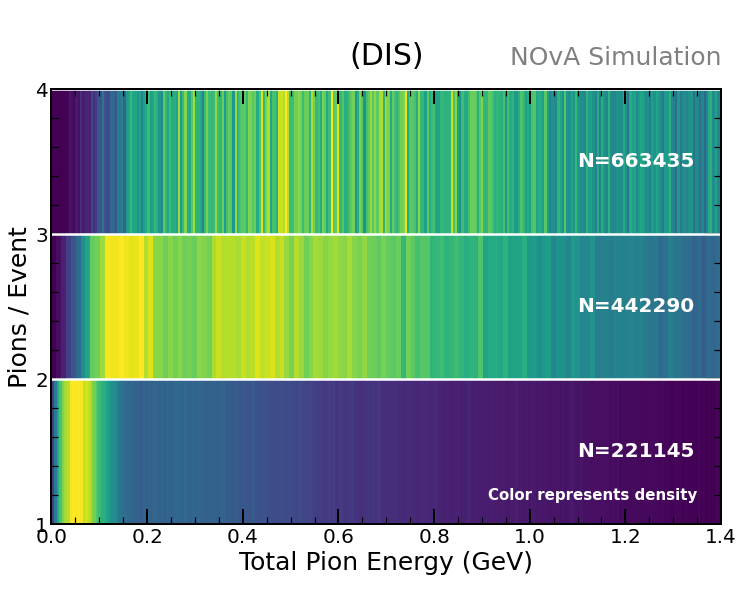

In [14]:
# Define x bins
#x_bins = np.linspace(0, 1.5, 100)

xstart=0
xend=1.4

bbins = []

for i in range(len(epis)):
    if i==0:
        bbins.append(np.linspace(xstart, xend, 100))
    else:
        bbins.append(np.linspace(xstart, xend, numbins(epis[i],0,6)))

# Define y values
y_values = [0.5, 1.5, 2.5,3.5,4.5]

# Define number of pions per event
num_pions_per_event = [len(epi) for epi in epis]

plt.figure(figsize=(12,8)) 

# Plot each histogram
for i, (epi, y_value, num_pions, bbin) in enumerate(zip(epis, y_values, num_pions_per_event, bbins), start=1):
    plt.hist2d(epi, np.zeros_like(epi)+y_value, bins=[bbin, 1], cmap='viridis')
    plt.text(1.1, y_value, f'N={(i-1)*num_pions}', color='white', fontsize=20, ha='left', va='center', fontweight='bold')


#plt.colorbar(label='Frequency')
plt.xlabel('Total Pion Energy (GeV)', fontsize=25)
plt.ylabel('Pions / Event',fontsize=25)
plt.ylim(1, 4)
set_plot_style()
#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=3)
plt.title(f'({folder})',y=1.042,fontsize=30)
plt.axhline(y=2, color='white', linewidth=2.5)
plt.axhline(y=3, color='white', linewidth=2.5)
plt.axhline(y=4, color='white', linewidth=2.5)
plt.text(1.35, 1.2, 'Color represents density', color='white', fontsize=15, ha='right', va='center',fontweight='bold')
# plt.savefig(f"{folder}/analysisfiles/images/hetamapTotalEnergy_NoRecoPions_part2_with_ntE_{folder}.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/hetamapTotalEnergy_NoRecoPions_part2_with_ntE_{folder}.png', bbox_inches='tight')
plt.show()

In [43]:
folder='QE'

In [44]:
start_time = time.time()
#create the energy lost distribution of pions

#store the list of non identified energy pions
temp=[]
energynt=[]
temp=read_file(folder, 'analysisfiles/energiesNT_part2')
energynt = [float(element)-0.138 for sublist in temp for element in sublist] 

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.04677414894104004 seconds


In [45]:
#LEts make an histogram of the lost distribution in energy of pions

def generate_energy_ranges(start, end, step):
    energy_ranges = []
    while start < end:
        energy_ranges.append((start, start + step))
        start += step
    return energy_ranges

start_value = 0
end_value = 2
step_value = 0.05


energy_ranges2 = generate_energy_ranges(start_value, end_value, step_value)


#energy_ranges2 = [(0, 0.2), (0.2, 0.4), (0.4,0.6) ,(0.6, 0.8), (0.8, 1),(1,1.2),(1.2,1.4),(1.4,1.6)]

energylost = []

for j, event in enumerate(energynt):
    for i, (start, end) in enumerate(energy_ranges2):
        if start <= event < end:
            energylost.append((i)*step_value)


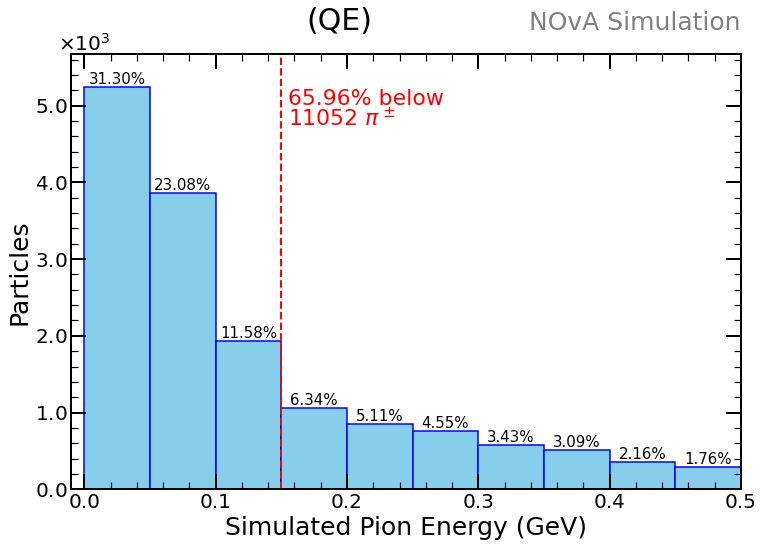

In [46]:
#plotting services

bin_size=0.05
e_limit=0.5 #MOVE ALSO THE CONDITIOPN IN PLT.TEXT IF NEEDED

n_value = 0.1500001


# Calculate total count
nevents = len(energylost)

# Define bin edges
bin_edges = np.arange(0, 0.8, bin_size)
# print(len(bin_edges))

# Create histogram
plt.figure(figsize=(12, 8))
plt.hist(energylost, bins=bin_edges, edgecolor='blue', linewidth=1.5, color='skyblue')

# Calculate and add percentage annotations
total_percent_before_line = 0
for i in range(len(bin_edges) - 1):
    count = np.count_nonzero((energylost >= bin_edges[i]) & (energylost < bin_edges[i+1]))
    percent = count / nevents * 100
    if bin_edges[i] + bin_size <= n_value:
        total_percent_before_line += percent
    if i < int(e_limit / bin_size):
        plt.text((bin_edges[i] + bin_edges[i+1]) / 2, count, f'{percent:.2f}%', ha='center', va='bottom', fontsize=15)
numpis=int(total_percent_before_line*(code_lists[f'Tot{folder}']-code_lists[f'Rec{folder}'])/100)
# Add vertical dotted line and label
plt.axvline(x=n_value, color='red', linestyle='--', linewidth=2)
plt.text(n_value + 0.005, plt.ylim()[1] * 0.9, f'{total_percent_before_line:.2f}% below', ha='left', va='bottom', fontsize=22, color='red')
plt.text(n_value + 0.005, plt.ylim()[1] * 0.85, fr'{numpis} $\pi^\pm$', ha='left', va='bottom', fontsize=22, color='red')


plt.xlabel('Simulated Pion Energy (GeV)', fontsize=25)
plt.ylabel('Particles', fontsize=25)
plt.title(f'({folder})',x=0.4, y=1.042, fontsize=30)
set_plot_style()
set_sn2()
plt.xlim(-0.01,e_limit)
#change the number of ticks in the y axis
# plt.locator_params(axis='y', nbins=3)
# y_max = plt.ylim()[1]
# plt.ylim(0,y_max+(0.03*y_max))
# Save and show plot
plt.savefig(f"{folder}/analysisfiles/images/lost_per_energy_part2_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/lost_per_energy_part2_{folder}.png', bbox_inches='tight')
plt.show()

#nipi=sum(numpiNT)
#print(f'total number of pions: {nipi}')

In [9]:
#now createan histogram with the lost percetange depending the number of pions in event
folder='QE'

#store the list of NT original numpi
pdgnt=[]
pdgnt=read_file2(folder, 'pdgntvars_total')

#store the list of Reco numpi
pdgpng=[]
pdgpng=read_file2(folder, 'pdgpngvars_total')

trknt=[]
trknt=read_file2(folder, 'trkNTvars_total')

#store the list of Reco numpi
trkpng=[]
trkpng=read_file2(folder, 'trkvars_total')

pionsntT=[]
pionsreT=[]
pionslostT=[]
for i, event in enumerate(pdgnt):
    npionsnt=0
    npionsre=0
    nttrk=[]
    retrk=[]
    for j, elementnt in enumerate(event):
        if elementnt == '211' or elementnt == '-211':
            nttrk.append(int(trknt[i][j]))
            npionsnt=npionsnt+1
    if npionsnt == 0:
        print(i)
    for k, elementre in enumerate(pdgpng[i]):
        if elementre == '211' or elementre == '-211':
            retrk.append(int(trkpng[i][k]))
    for element in nttrk:
        if element in retrk:
            npionsre=npionsre+1
            
    #until here i know the true pions and the lsot pions, i need to associate both
    for f in range(npionsnt):
        pionsntT.append(npionsnt)
    
    #save the simulated true npi
#     pionsntT.append(npionsnt)
    #for the second list will add the amount of lost pions but with flag of the true number of pions:
    lostpi=npionsnt-npionsre
    for g in range(lostpi):
        pionslostT.append(npionsnt)
    
#     pionsreT.append(npionsnt - npionsre)
    

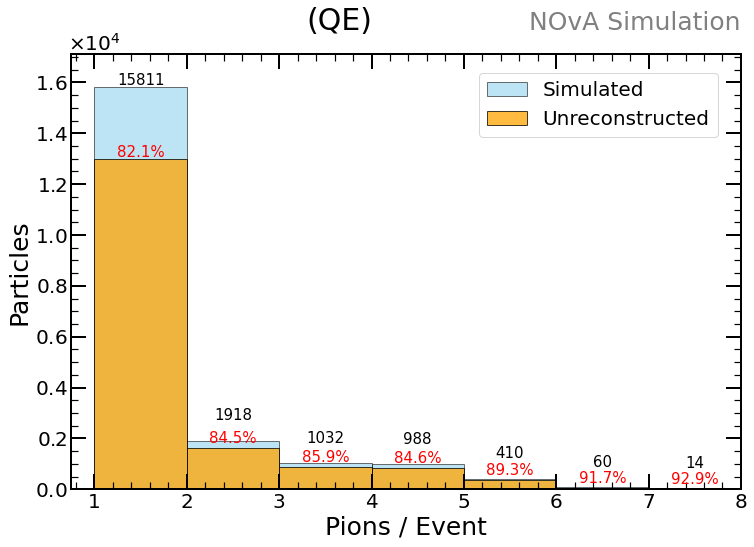

In [10]:
import matplotlib.pyplot as plt
import numpy as np


# Define the bin size
bin_size = 1
maxval=8
plt.figure(figsize=(12, 8))


# Create histograms
ntT_counts, bins_ntT = np.histogram(pionsntT, bins=range(min(pionsntT), maxval + bin_size, bin_size))
reT_counts, bins_reT = np.histogram(pionslostT, bins=range(min(pionslostT), maxval + bin_size, bin_size))

# Plot the first histogram (pionsntT) in blue
plt.hist(pionsntT, bins=range(min(pionsntT), max(pionsntT) + bin_size, bin_size), alpha=0.55, label='Simulated', color='skyblue',edgecolor='black')
# for i in range(len(ntT_counts)):
#     plt.text(bins_ntT[i] + 0.5, ntT_counts[i] + 0.5, str(ntT_counts[i]), ha='center', color='blue')

# Overlay the second histogram (pionsreT) in red
plt.hist(pionslostT, bins=range(min(pionslostT), max(pionslostT) + bin_size, bin_size), alpha=0.75, label='Unreconstructed', color='orange',edgecolor='black')
for i in range(len(reT_counts)):
    if i < len(ntT_counts) and ntT_counts[i] > 0:  # Avoid division by zero
        percentage = (reT_counts[i] / ntT_counts[i]) * 100
        if percentage > 83:
#         if percentage > 88: #USE FOR DIS
#             y_text1 = ntT_counts[i] + len(pionsntT)*0.07  # Move the first histogram's text upwards more
            y_text1 = ntT_counts[i] + len(pionsntT)*0.04  #USE FOR DIS
#             y_text2 = reT_counts[i] + len(pionsntT)*0.02  # Move the percentage text upwards more
            y_text2 = reT_counts[i] + len(pionsntT)*0.01  # USE FOR DIS
        else:
            y_text1 = ntT_counts[i] + len(pionsntT)*0.005
            y_text2 = reT_counts[i] + len(pionsntT)*0.005
        
        # Adjust for overlapping texts
        if abs(y_text1 - y_text2) < 1:
            offset1 = 0.5 if y_text1 > y_text2 else -0.5
            offset2 = -0.5 if y_text1 > y_text2 else 0.5
        else:
            offset1 = 0
            offset2 = 0

        plt.text(bins_ntT[i] + 0.5, y_text1 + offset1, str(ntT_counts[i]), ha='center', color='black',fontsize=15)
        plt.text(bins_reT[i] + 0.5, y_text2 + offset2, f'{percentage:.1f}%', ha='center', color='red',fontsize=15)

# Add labels and legend
plt.xlabel('Pions / Event',fontsize=25)
plt.ylabel('Particles',fontsize=25)
plt.title(f'({folder})',x=0.4,y=1.042, fontsize=30)
set_plot_style()
plt.xlim(0.75,maxval)
set_sn3()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.savefig(f"{folder}/analysisfiles/images/lost_per_event_part2_{folder}.png")
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/lost_per_event_part2_{folder}.png', bbox_inches='tight')
# Show the plot
plt.show()


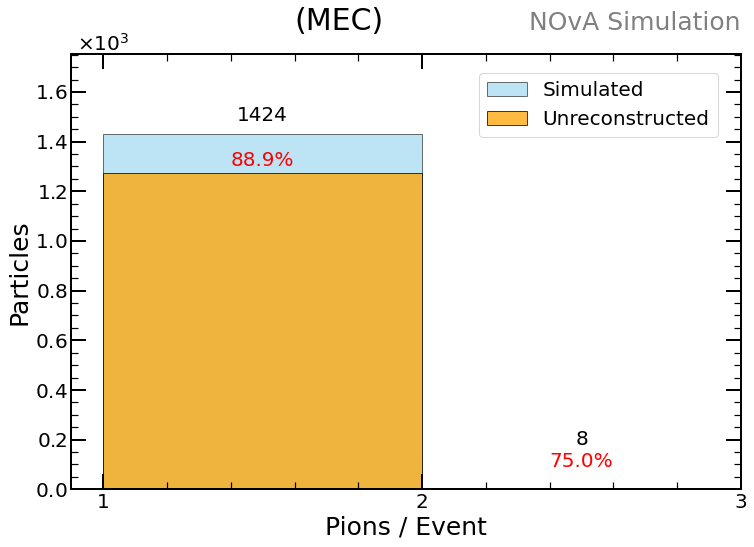

In [4]:
import matplotlib.pyplot as plt
import numpy as np
#SPECIFIC FOR MEC 

# Define the bin size
bin_size = 1
maxval=3
plt.figure(figsize=(12, 8))


# Create histograms
ntT_counts, bins_ntT = np.histogram(pionsntT, bins=range(min(pionsntT), maxval + bin_size, bin_size))
reT_counts, bins_reT = np.histogram(pionslostT, bins=range(min(pionslostT), maxval + bin_size, bin_size))

# Plot the first histogram (pionsntT) in blue
plt.hist(pionsntT, bins=range(min(pionsntT), max(pionsntT) + bin_size, bin_size), alpha=0.55, label='Simulated', color='skyblue',edgecolor='black')
# for i in range(len(ntT_counts)):
#     plt.text(bins_ntT[i] + 0.5, ntT_counts[i] + 0.5, str(ntT_counts[i]), ha='center', color='blue')

# Overlay the second histogram (pionsreT) in red
plt.hist(pionslostT, bins=range(min(pionslostT), max(pionslostT) + bin_size, bin_size), alpha=0.75, label='Unreconstructed', color='orange',edgecolor='black')
for i in range(len(reT_counts)):
    if i < len(ntT_counts) and ntT_counts[i] > 0:  # Avoid division by zero
        percentage = (reT_counts[i] / ntT_counts[i]) * 100
#         if percentage > 83:
        if percentage > 80: #USE FOR DIS
#             y_text1 = ntT_counts[i] + len(pionsntT)*0.07  # Move the first histogram's text upwards more
            y_text1 = ntT_counts[i] + len(pionsntT)*0.04  #USE FOR DIS
#             y_text2 = reT_counts[i] + len(pionsntT)*0.02  # Move the percentage text upwards more
            y_text2 = reT_counts[i] + len(pionsntT)*0.025  # USE FOR DIS
        else:
            y_text1 = ntT_counts[i] + len(pionsntT)*0.12
            y_text2 = reT_counts[i] + len(pionsntT)*0.06
        
        # Adjust for overlapping texts
        if abs(y_text1 - y_text2) < 1:
            offset1 = 0.5 if y_text1 > y_text2 else -0.5
            offset2 = -0.5 if y_text1 > y_text2 else 0.5
        else:
            offset1 = 0
            offset2 = 0

        plt.text(bins_ntT[i] + 0.5, y_text1 + offset1, str(ntT_counts[i]), ha='center', color='black',fontsize=20)
        plt.text(bins_reT[i] + 0.5, y_text2 + offset2, f'{percentage:.1f}%', ha='center', color='red',fontsize=20)

# Add labels and legend
plt.xlabel('Pions / Event',fontsize=25)
plt.ylabel('Particles',fontsize=25)
plt.title(f'({folder})',x=0.4,y=1.042, fontsize=30)
set_plot_style()
plt.xlim(0.9,maxval)
plt.ylim(0,1700)
plt.locator_params(axis='x', nbins=2)
set_sn3()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.savefig(f"{folder}/analysisfiles/images/lost_per_event_part2_{folder}.png")
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/lost_per_event_part2_{folder}.png', bbox_inches='tight')
# Show the plot
plt.show()

In [97]:
folder='NoCut'

In [98]:
#EXTRACTING THE NEUTRINO ENERGY FOR THE EVENTS WITH UNDETECTED PIONS
start_time = time.time()

#neutrino energy
temp=[]
nue_u=[]
temp=read_file(folder, 'analysisfiles/nue_part2')
nue_u = [float(element) for sublist in temp for element in sublist]

#numpi
temp=[]
numpint=[]
temp=read_file(folder, 'analysisfiles/numpiNT_part2')
numpint = [int(element) for sublist in temp for element in sublist]

#numpireco
temp=[]
numpiReco=[]
temp=read_file(folder, 'analysisfiles/numpiReco_part2')
numpiReco = [int(element) for sublist in temp for element in sublist] 
        

j=0
nue_u_1pion = []
for event in nue_u:
    if numpint[j] == 1 and numpiReco[j] == 0:
        nue_u_1pion.append(event)
    j = j+1

    
#save the info of the nu energies per number of pion in event   
nues = [[] for _ in range(7)]
j=0
nue_u_pi2Nopi = []
for i, event in enumerate(nue_u):
    if numpint[i] < len(nues):
        if numpiReco[i] == 0:
            #append in the all pi2pi list
            nue_u_pi2Nopi.append(event)
            #then append in the separate numpi list for the heatmap
            nues[numpint[i]].append(event)


#save the info of the nu energies per number of pion in event   
#nues = [[] for _ in range(15)]

#pos=0
#for element in numpint:
#    nues[element].append(nue_u[pos])
#    pos=pos+1
    
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 3.844926118850708 seconds


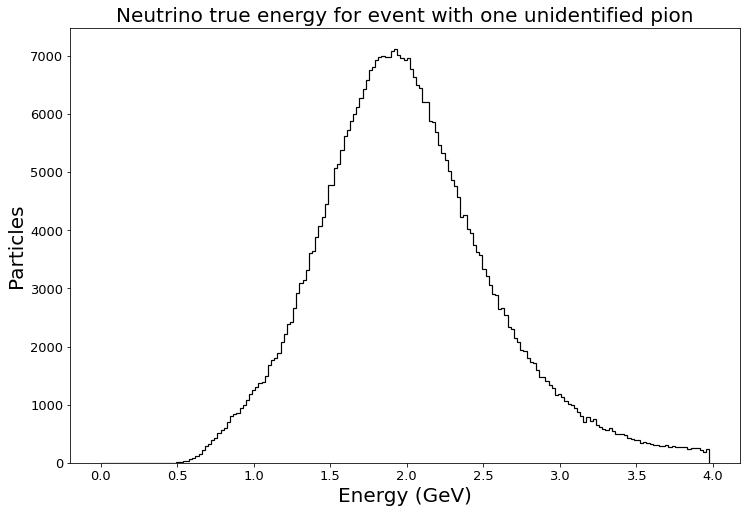

In [99]:
#TRUTH ENERGY OF NEUTRINOS 
#bin_size = 0.025
#bin_edges = np.arange(0, 4, bin_size) 

plt.figure(figsize=(12, 8)) 
plt.hist(nue_u_1pion, bins=autobins(nue_u_1pion,0,4), edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('Energy (GeV)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title(f'Neutrino true energy for event with one unidentified pion', fontsize=20)
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
#plt.yscale('log')
plt.savefig(f"{folder}/analysisfiles/images/nue_1pion_pi2Nopi_part2.png")
plt.show()

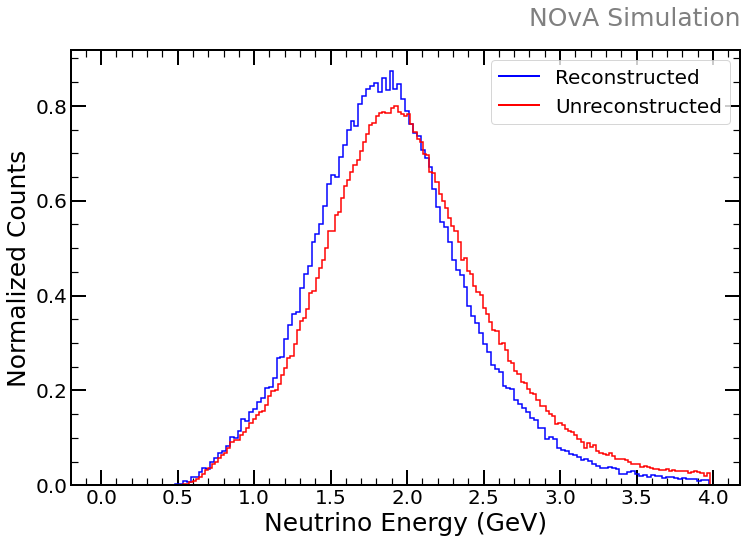

In [100]:
# Define histogram parameters
#bin_size = 0.025
#bin_edges = np.arange(0, 4, bin_size) 

%store -r nue_d_1pion
# Calculate histograms
hist_nt, _ = np.histogram(nue_d_1pion, bins=autobins(nue_d_1pion,0,4), density=True)
hist_nt_part2, _ = np.histogram(nue_u_1pion, bins=autobins(nue_u_1pion,0,4), density=True)

# Plot both normalized histograms on the same plot
plt.figure(figsize=(12, 8)) 

# Plot truth energy histogram
plt.hist(nue_d_1pion, bins=autobins(nue_d_1pion,0,4), edgecolor='blue', linewidth=1.5, histtype='step', label='Reconstructed', density=True)

# Plot reco energy histogram
plt.hist(nue_u_1pion, bins=autobins(nue_u_1pion,0,4), edgecolor='red', linewidth=1.5, histtype='step', label='No Reconstructed', density=True)

plt.xlabel('Neutrino Energy (GeV)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
# plt.title('Neutrino energy for events with one pion', fontsize=30)

set_plot_style(['Reconstructed', 'Unreconstructed'])
# plt.savefig(f"{folder}/analysisfiles/images/NuEnergy_comparison_for1pion_part1_part2.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/NuEnergy_comparison_for1pion_part1_part2_{folder}.png', bbox_inches='tight')
plt.show()

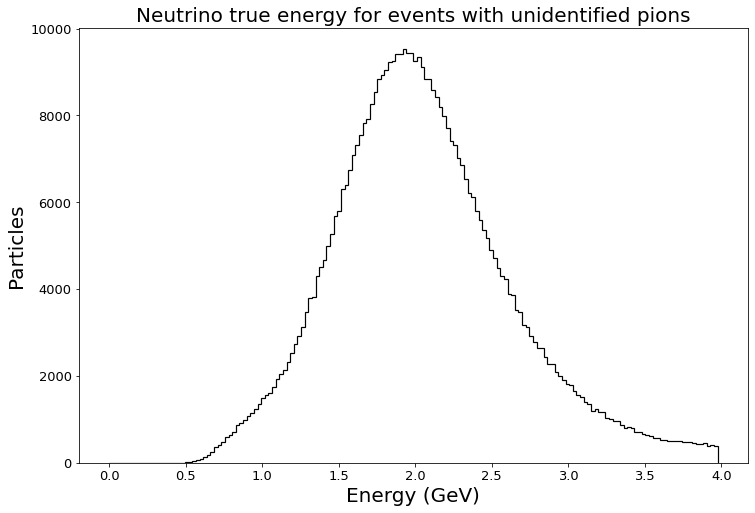

In [101]:
#TRUTH ENERGY OF NEUTRINOS 
#bin_size = 0.025
#bin_edges = np.arange(0, 4, bin_size) 

plt.figure(figsize=(12, 8)) 
plt.hist(nue_u_pi2Nopi, bins=autobins(nue_u_pi2Nopi,0,4), edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('Energy (GeV)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title(f'Neutrino true energy for events with unidentified pions', fontsize=20)
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
#plt.yscale('log')
plt.savefig(f"{folder}/analysisfiles/images/nue_ALL_pi2Nopi_part2.png")
plt.show()

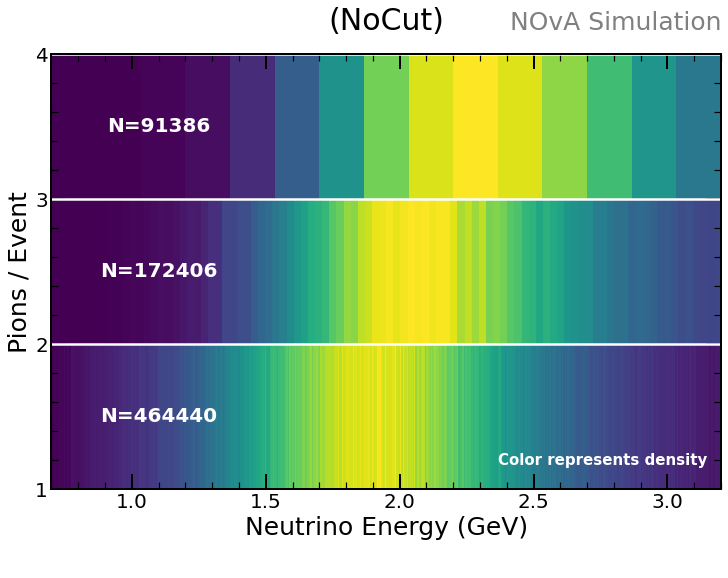

In [102]:
# Define x bins
#THIS GRAPH DOES NOT WORKL. IS NOT USEFUL AS IT IS.
#x_bins = np.linspace(0, 4, 100)
xstart=0.7
xend=3.2

bbins = []

for i in range(len(nues)):
    if i==0:
        bbins.append(np.linspace(xstart, xend, 100))
    else:
        bbins.append(np.linspace(xstart, xend, numbins(nues[i],0,10)))

# Define y values
y_values = [0.5, 1.5, 2.5, 3.5]

# Define number of pions per event
num_pions_per_event = [len(nueh) for nueh in nues]

plt.figure(figsize=(12,8)) 

# Plot each histogram
for i, (nueh, y_value, num_pions, bbin) in enumerate(zip(nues, y_values, num_pions_per_event, bbins), start=1):
    plt.hist2d(nueh, np.zeros_like(nueh)+y_value, bins=[bbin, 1], cmap='viridis')
    plt.text(1.1, y_value, f'N={(i-1)*num_pions}', color='white', fontsize=20, ha='center', va='center', fontweight='bold')

set_plot_style()
#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=3)

#plt.colorbar(label='Frequency')
plt.xlabel('Neutrino Energy (GeV)',fontsize=25)
plt.ylabel('Pions / Event',fontsize=25)
plt.ylim(1, 4)
plt.axhline(y=2, color='white', linewidth=2.5)
plt.axhline(y=3, color='white', linewidth=2.5)
plt.axhline(y=4, color='white', linewidth=2.5)
plt.title(f'({folder})',y=1.042,fontsize=30)
plt.text(3.15, 1.2, 'Color represents density', color='white', fontsize=15, ha='right', va='center',fontweight='bold')
# plt.text(0.98, 0.05, 'Color represents density', color='white', fontsize=15, ha='right', va='bottom', transform=plt.gca().transAxes)
# plt.savefig(f"{folder}/analysisfiles/images/hetamapNeutrinoEnergy_fornodetectedPions_part2.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/hetamapNeutrinoEnergy_fornodetectedPions_part2_{folder}.png', bbox_inches='tight')

plt.show()

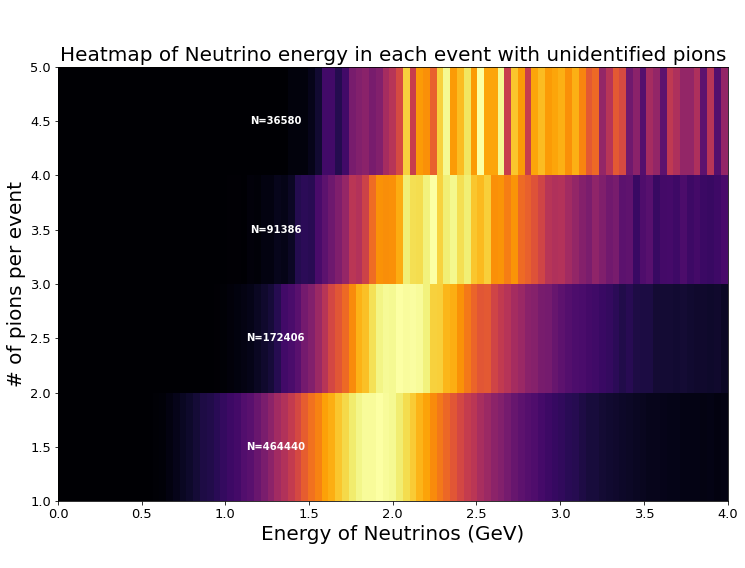

In [103]:
# Define x bins
x_bins = np.linspace(0, 4, 100)

# Define y values
y_values = [0.5, 1.5, 2.5, 3.5,4.5,5.5]

# Define number of pions per event
num_pions_per_event = [len(nueh) for nueh in nues]

plt.figure(figsize=(12, 8)) 

# Plot each histogram
for i, (nueh, y_value, num_pions) in enumerate(zip(nues, y_values, num_pions_per_event), start=1):
    plt.hist2d(nueh, np.zeros_like(nueh)+y_value, bins=[x_bins, 1], cmap='inferno')
    plt.text(1.3, y_value, f'N={(i-1)*num_pions}', color='white', fontsize=10, ha='center', va='center', fontweight='bold')

#plt.colorbar(label='Frequency')
plt.xlabel('Energy of Neutrinos (GeV)',fontsize=20)
plt.ylabel('# of pions per event',fontsize=20)
plt.ylim(1, 5)
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
plt.title('Heatmap of Neutrino energy in each event with unidentified pions',fontsize=20)
# plt.savefig(f"{folder}/analysisfiles/images/hetamapNeutrinoEnergy_forNOdetectedPions_part2.png")
plt.show()

In [104]:
#now lets check the NT and reco vertex position for the identified particles

start_time = time.time()


#neutrino energy
temp=[]
temp=read_file(folder, 'analysisfiles/vtxpos_part2')

vtxXpos2 = []
vtxYpos2 = []
vtxZpos2 = []

for event in temp:
    #event = event[1:-1]
    l = len(event)
    nveces=l/3
    nn=0
    for i in range(int(nveces)):
        vtxXpos2.append(float(event[i+nn]))
        vtxYpos2.append(float(event[i+1+nn]))
        vtxZpos2.append(float(event[i+2+nn]))
        nn=nn+2
        
        
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 2.4809937477111816 seconds


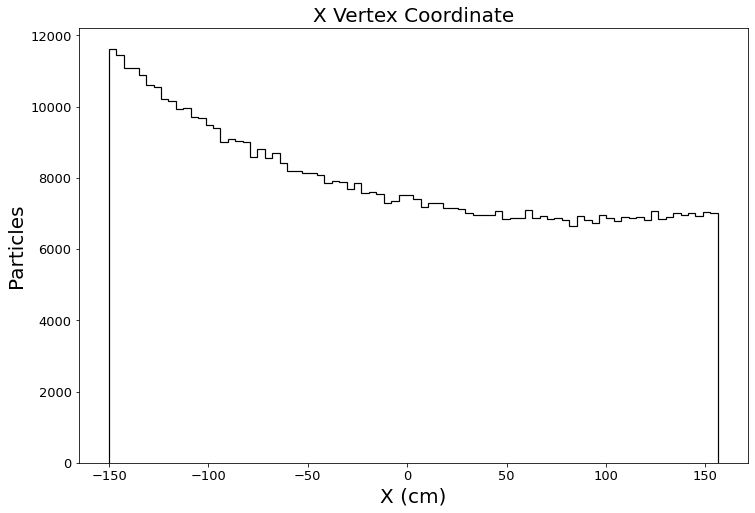

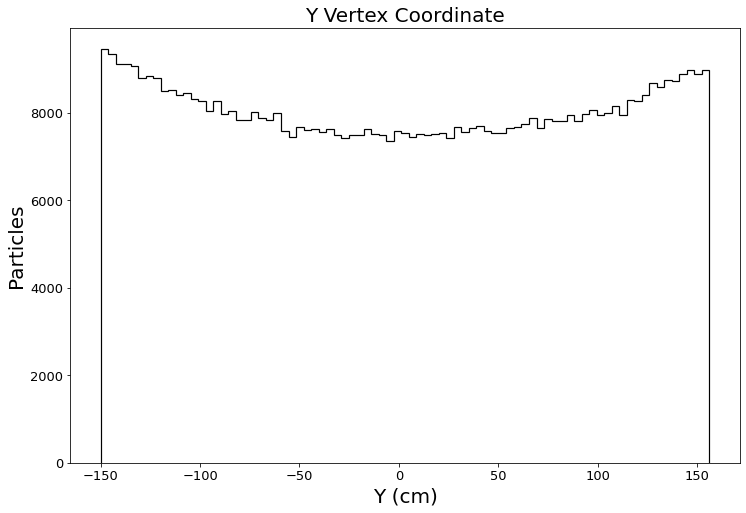

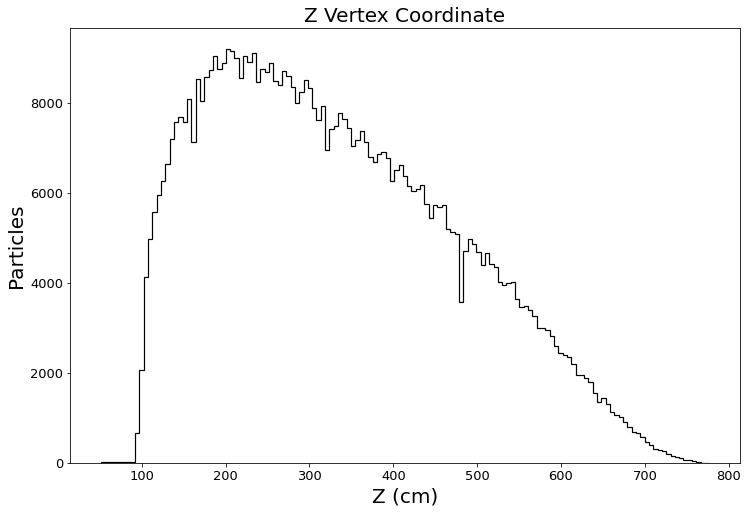

In [105]:
bin_size = 10


#X
# Define histogram parameters
# data_min = np.min(vtxXpos2)
# data_max = np.max(vtxXpos2)
# hist_min = data_min - 30
# hist_max = data_max + 30

# num_bins = int((hist_max - hist_min) / bin_size)
# bin_edges = np.linspace(hist_min, hist_max, num_bins + 1)
#bin_edges = np.arange(0, 3, bin_size) 
    
plt.figure(figsize=(12, 8)) 
plt.hist(vtxXpos2, bins=autobins(vtxXpos2), edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('X (cm)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('X Vertex Coordinate', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
plt.savefig(f"{folder}/analysisfiles/images/vtxx_part2.png")
plt.show()


#Y
# Define histogram parameters
# data_min = np.min(vtxYpos2)
# data_max = np.max(vtxYpos2)
# hist_min = data_min - 30
# hist_max = data_max + 30

# num_bins = int((hist_max - hist_min) / bin_size)
# bin_edges = np.linspace(hist_min, hist_max, num_bins + 1)
# #bin_edges = np.arange(0, 3, bin_size) 

plt.figure(figsize=(12, 8)) 
plt.hist(vtxYpos2, bins=autobins(vtxYpos2), edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('Y (cm)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Y Vertex Coordinate', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
plt.savefig(f"{folder}/analysisfiles/images/vtxY_part2.png")
plt.show()


#Z
# Define histogram parameters
# data_min = np.min(vtxZpos2)
# data_max = np.max(vtxZpos2)
# hist_min = data_min - 30
# hist_max = data_max + 30

# num_bins = int((hist_max - hist_min) / bin_size)
# bin_edges = np.linspace(hist_min, hist_max, num_bins + 1)
# #bin_edges = np.arange(0, 3, bin_size) 
    
plt.figure(figsize=(12, 8)) 
plt.hist(vtxZpos2, bins=autobins(vtxZpos2), edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('Z (cm)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Z Vertex Coordinate', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
plt.savefig(f"{folder}/analysisfiles/images/vtxZ_part2.png")
plt.show()


In [106]:
folder='NoCut'

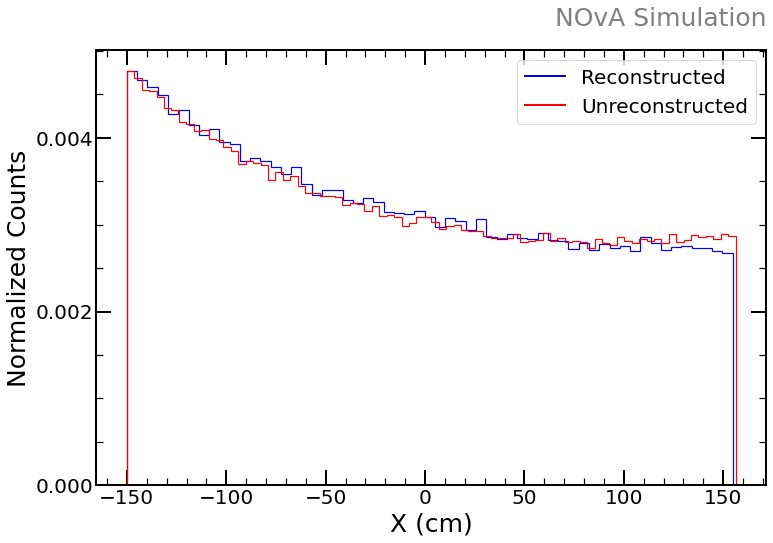

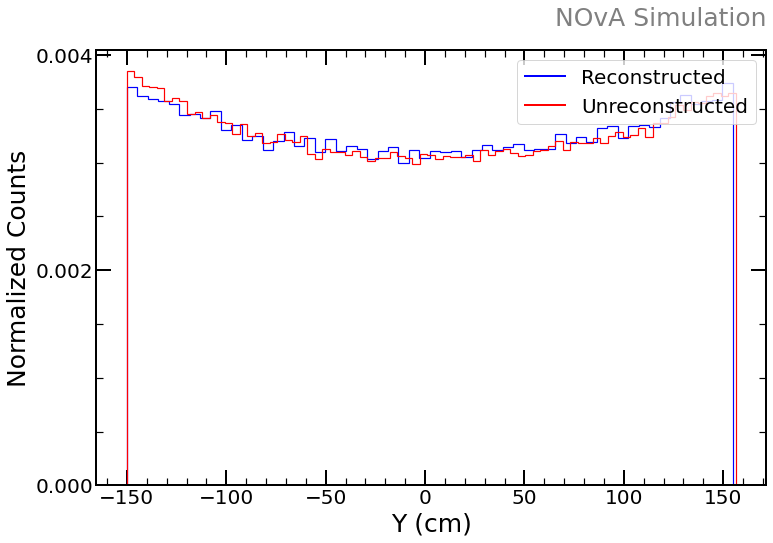

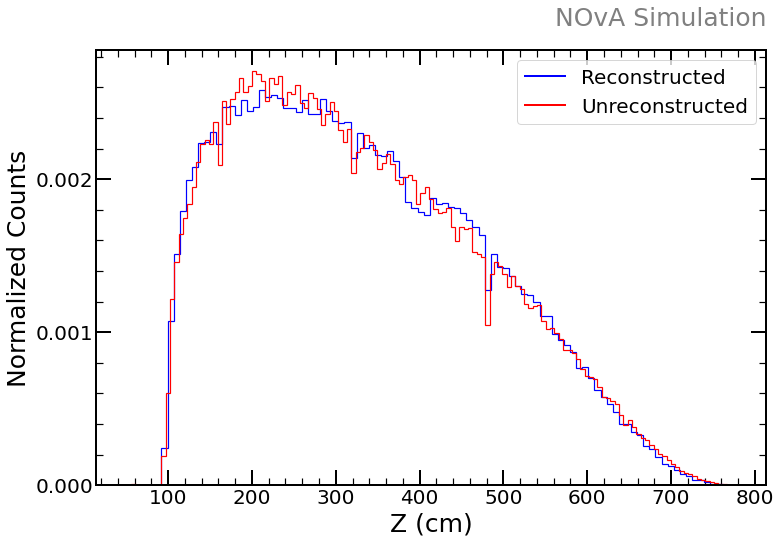

In [107]:
# Define histogram parameters
bin_size = 10
bin_edges = np.arange(-200, 200, bin_size) 

%store -r vtxXpos
%store -r vtxYpos
%store -r vtxZpos

# Calculate histograms
hist_nt, _ = np.histogram(vtxXpos, bins=autobins(vtxXpos), density=True)
hist_reco, _ = np.histogram(vtxXpos2, bins=autobins(vtxXpos2), density=True)

# Plot both normalized histograms on the same plot
plt.figure(figsize=(12, 8)) 

# Plot truth energy histogram
plt.hist(vtxXpos, bins=autobins(vtxXpos), edgecolor='blue', linewidth=1.2, histtype='step', label='Reco pions', density=True)

# Plot reco energy histogram
plt.hist(vtxXpos2, bins=autobins(vtxXpos2), edgecolor='red', linewidth=1.2, histtype='step', label='No Reco pions', density=True)

plt.xlabel('X (cm)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
# plt.title('Truth Pion X position', fontsize=30)
#change the number of ticks in the y axis
set_plot_style(['Reconstructed', 'Unreconstructed'])
plt.locator_params(axis='y', nbins=4)

# plt.savefig(f"{folder}/analysisfiles/images/Xpos_comparison_histogram_nomralized_part1_part2.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/Xpos_comparison_histogram_nomralized_part1_part2_{folder}.png', bbox_inches='tight')

plt.show()


# Calculate histograms
hist_nt, _ = np.histogram(vtxYpos, bins=autobins(vtxYpos), density=True)
hist_reco, _ = np.histogram(vtxYpos2, bins=autobins(vtxYpos2), density=True)

# Plot both normalized histograms on the same plot
plt.figure(figsize=(12, 8)) 

# Plot truth energy histogram
plt.hist(vtxYpos, bins=autobins(vtxYpos), edgecolor='blue', linewidth=1.2, histtype='step', label='Reco pions', density=True)

# Plot reco energy histogram
plt.hist(vtxYpos2, bins=autobins(vtxYpos2), edgecolor='red', linewidth=1.2, histtype='step', label='No Reco pions', density=True)

plt.xlabel('Y (cm)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
# plt.title('Truth Pion Y position', fontsize=25)
set_plot_style(['Reconstructed', 'Unreconstructed'])
#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)

# plt.savefig(f"{folder}/analysisfiles/images/Ypos_comparison_histogram_nomralized_part1_part2.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/Ypos_comparison_histogram_nomralized_part1_part2_{folder}.png', bbox_inches='tight')

plt.show()


bin_edges = np.arange(0, 900, bin_size) 
# Calculate histograms
hist_nt, _ = np.histogram(vtxZpos, bins=autobins(vtxZpos), density=True)
hist_reco, _ = np.histogram(vtxZpos2, bins=autobins(vtxZpos2), density=True)

# Plot both normalized histograms on the same plot
plt.figure(figsize=(12, 8)) 

# Plot truth energy histogram
plt.hist(vtxZpos, bins=autobins(vtxZpos), edgecolor='blue', linewidth=1.2, histtype='step', label='Reco pions', density=True)

# Plot reco energy histogram
plt.hist(vtxZpos2, bins=autobins(vtxZpos2), edgecolor='red', linewidth=1.2, histtype='step', label='No Reco pions', density=True)

plt.xlabel('Z (cm)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
# plt.title('Truth Pion Z position', fontsize=25)
set_plot_style(['Reconstructed', 'Unreconstructed'])
#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)

# plt.savefig(f"{folder}/analysisfiles/images/Zpos_comparison_histogram_nomralized_part1_part2.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/Zpos_comparison_histogram_nomralized_part1_part2_{folder}.png', bbox_inches='tight')

plt.show()

In [8]:
folder='Res'

In [9]:
#EXTRACT THETA AND ALPHA INFORMATION
start_time = time.time()

#theta
temp=[]
theta2=[]
temp=read_file(folder, 'analysisfiles/theta_part2')
theta2 = [float(element)*(180/math.pi) for sublist in temp for element in sublist] 
   
#alpha
temp=[]
temp=read_file(folder, 'analysisfiles/alpha_part2')

alpha2 = []


for event in temp:
    
    l = len(event)
    num =int(l/3)-1
    mm=0
    for i in range(num):
        mm=mm+3
        vector1 = np.array([float(event[0]), float(event[1]), float(event[2])])
        vector2 = np.array([float(event[mm]), float(event[mm+1]), float(event[mm+2])])
        dot_product = np.dot(vector1, vector2)
        magnitude_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
        cosine_theta = dot_product / magnitude_product
        angle_radians = np.arccos(cosine_theta)
        degrees_angle = angle_radians * (180 / math.pi)
        alpha2.append(degrees_angle)
        #alpha2.append(angle_radians)

        
#energies
temp=[]
energies=[]
temp=read_file(folder, 'analysisfiles/energiesNT_part2')
energies = [float(element) for sublist in temp for element in sublist]         

            
#after that, lets see how is the behavior of the cvn values with respect to ranges of energy.

energy_ranges = [(0, 0.2), (0.2, 0.5), (0.5, 1), (1, 1.5), (1.5, 2)]

#filenames = [f'{folder}/evd/{Npi_nt}pion/run_E{i}_{Npi_nt}pion_{analysis}.txt' for i in range(len(energy_ranges))]

# Initialize a list to store filtered runs for each energy range
alphas2 = [[] for _ in range(len(energy_ranges))] 
thetas2 = [[] for _ in range(len(energy_ranges))] 

for j, event in enumerate(energies):
    for i, (start, end) in enumerate(energy_ranges):
        if start <= event < end:
            alphas2[i].append(alpha2[j])
            thetas2[i].append(theta2[j])
        
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")



Elapsed time: 11.059520721435547 seconds


In [42]:
print(min(energies))

0.139574


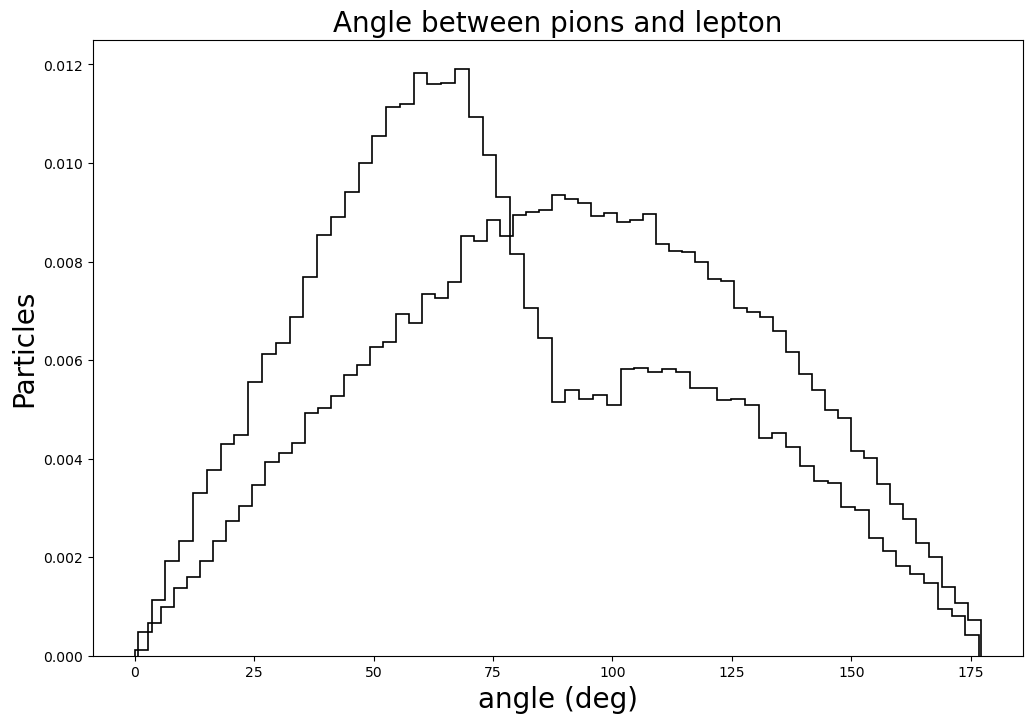

In [292]:
thetas=[]
%store -r thetas
plt.figure(figsize=(12, 8)) 
plt.hist(thetas[0], bins=autobins(thetas[0]), edgecolor='black', linewidth=1.2, histtype='step',density=True)
plt.hist(thetas2[0], bins=autobins(thetas2[0]), edgecolor='black', linewidth=1.2, histtype='step',density=True)

plt.xlabel('angle (deg)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Angle between pions and lepton', fontsize=20)

plt.show()

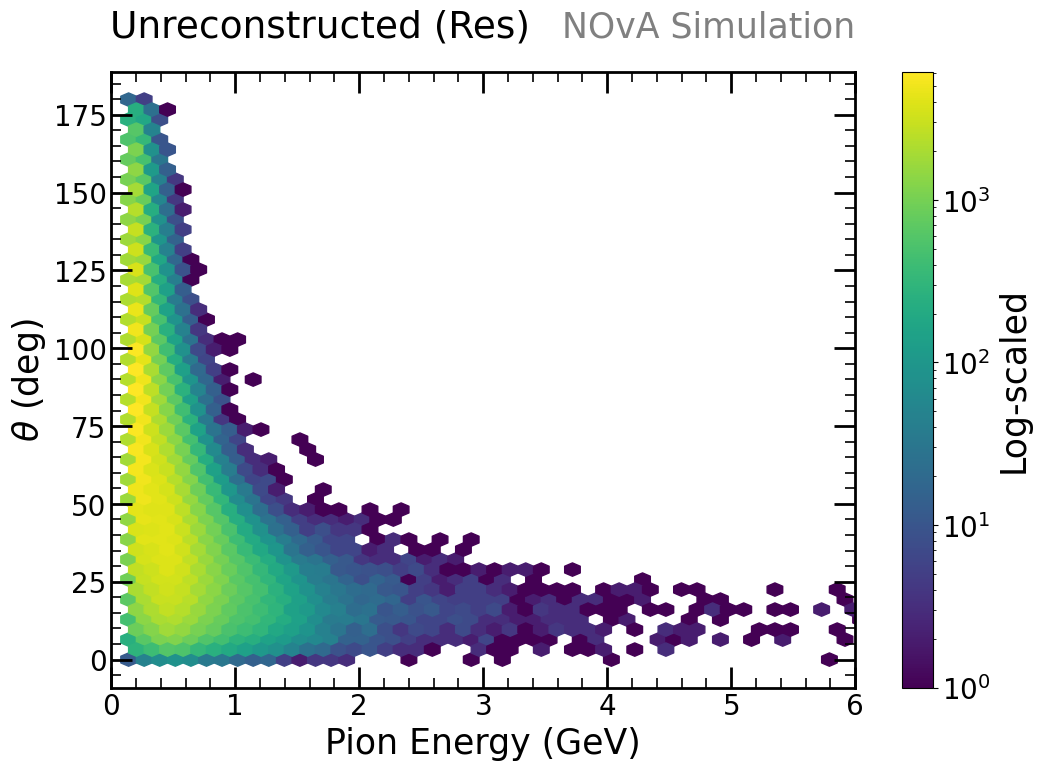

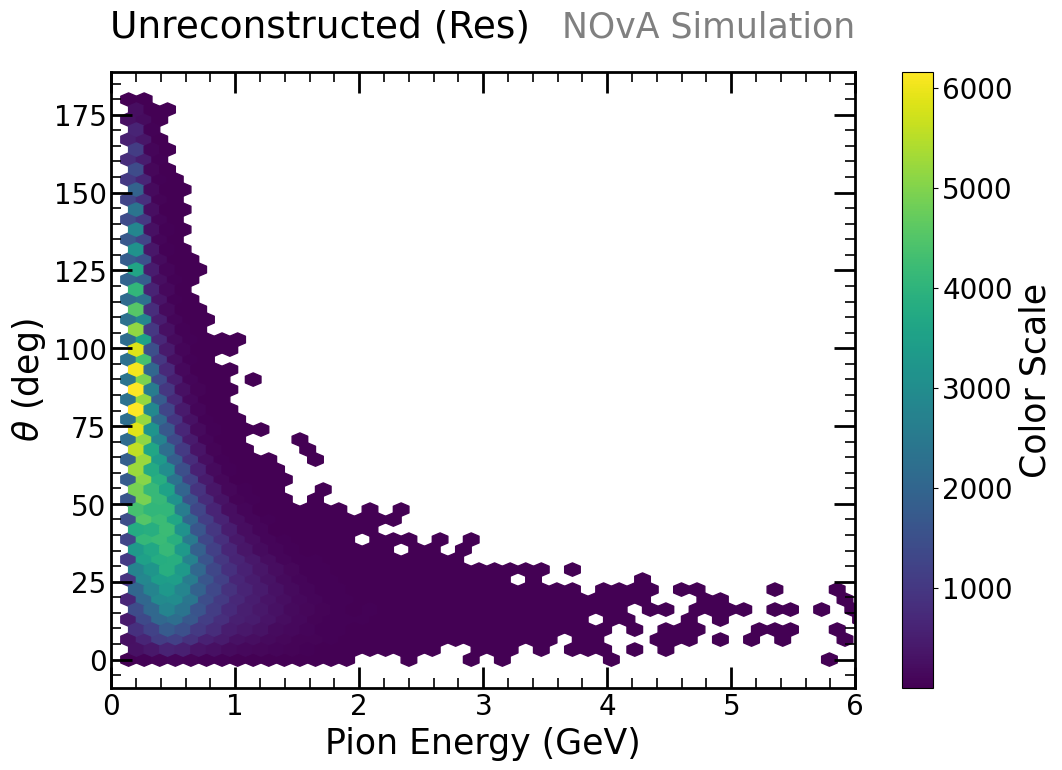

In [390]:
import matplotlib.colors as mcolors

# Ensure energies and theta2 are numpy arrays
energies_hb = np.array(energies)
theta_hb = np.array(theta2)

# Sample the data
# sample_size = 500000  # Sample 100,000 points
# indices = np.random.choice(len(energies_hb), sample_size, replace=False)
# sampled_energies = energies_hb[indices]
# sampled_theta2 = theta2_hb[indices]

mask = energies_hb <= 7


energies_hb_mask = energies_hb[mask]
theta_hb_mask = theta_hb[mask]
# Create the plot
plt.figure(figsize=(12, 8))

# Create a hexbin plot with sampled data
hb = plt.hexbin(energies_hb_mask, theta_hb_mask, gridsize=50, cmap='viridis', mincnt=1, norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Log-scaled', fontsize=25)
cb.ax.tick_params(labelsize=20) 


# Set labels and title
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel(fr'$\theta$ (deg)', fontsize=25)
plt.title(f'Unreconstructed ({folder})', x=0.28,y=1.042,fontsize=27)
set_plot_style()
plt.xlim(0, 6)
# plt.savefig(f"{folder}/analysisfiles/images/scatter_E_theta_part2_{folder}.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/scatter_E_theta_part2_{folder}.png', bbox_inches='tight')

plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_theta_part2_{folder}.png", bbox_inches='tight')

plt.show()


plt.figure(figsize=(12, 8))

# Create a hexbin plot with sampled data
hb = plt.hexbin(energies_hb_mask, theta_hb_mask, gridsize=50, cmap='viridis', mincnt=1)

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Color Scale', fontsize=25)
cb.ax.tick_params(labelsize=20) 


# Set labels and title
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel(fr'$\theta$ (deg)', fontsize=25)
plt.title(f'Unreconstructed ({folder})', x=0.28,y=1.042,fontsize=27)
set_plot_style()
plt.xlim(0, 6)
# plt.savefig(f"{folder}/analysisfiles/images/scatter_E_theta_normal_part2_{folder}.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/scatter_E_theta_normal_part2_{folder}.png', bbox_inches='tight')

plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_theta_normal_part2_{folder}.png", bbox_inches='tight')

plt.show()

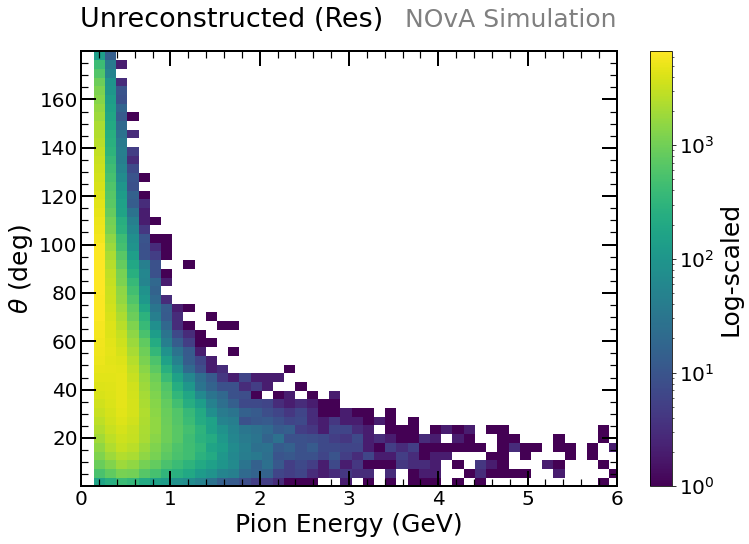

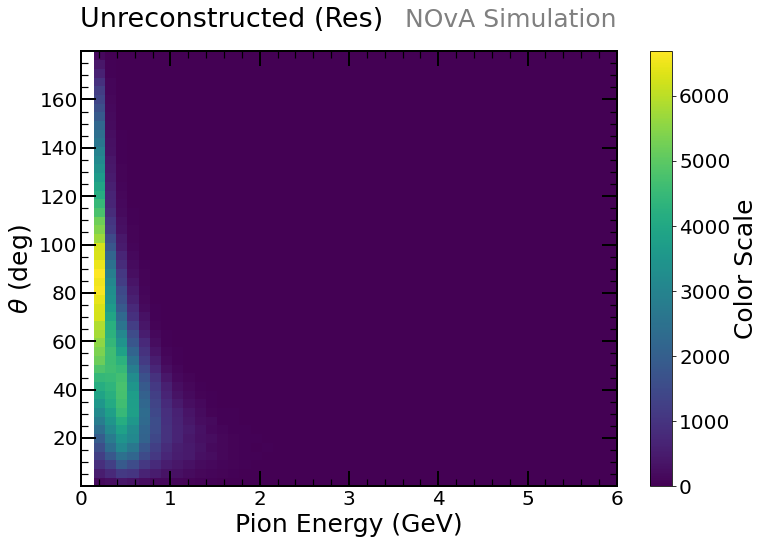

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Ensure energies and theta2 are numpy arrays
energies_hb = np.array(energies)
theta_hb = np.array(theta2)

# Apply mask to energies and theta2
mask = energies_hb <= 7
energies_hb_mask = energies_hb[mask]
theta_hb_mask = theta_hb[mask]

# Create the plot
plt.figure(figsize=(12, 8))

# Create a 2D histogram with square bins
hb = plt.hist2d(energies_hb_mask, theta_hb_mask, bins=(50, 50), cmap='viridis', norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb[3])
cb.set_label('Log-scaled', fontsize=25)
cb.ax.tick_params(labelsize=20) 

# Set labels and title
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel(r'$\theta$ (deg)', fontsize=25)
plt.title(f'Unreconstructed ({folder})', x=0.28, y=1.042, fontsize=27)
set_plot_style()
plt.xlim(0, 6)

# Save the plot
# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_theta_part2_{folder}.png", bbox_inches='tight')

plt.show()

plt.figure(figsize=(12, 8))

# Create another 2D histogram with square bins
hb = plt.hist2d(energies_hb_mask, theta_hb_mask, bins=(50, 50), cmap='viridis')

# Add color bar
cb = plt.colorbar(hb[3])
cb.set_label('Color Scale', fontsize=25)
cb.ax.tick_params(labelsize=20) 

# Set labels and title
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel(r'$\theta$ (deg)', fontsize=25)
plt.title(f'Unreconstructed ({folder})', x=0.28, y=1.042, fontsize=27)
set_plot_style()
plt.xlim(0, 6)

# Save the plot
# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_theta_normal_part2_{folder}.png", bbox_inches='tight')

plt.show()


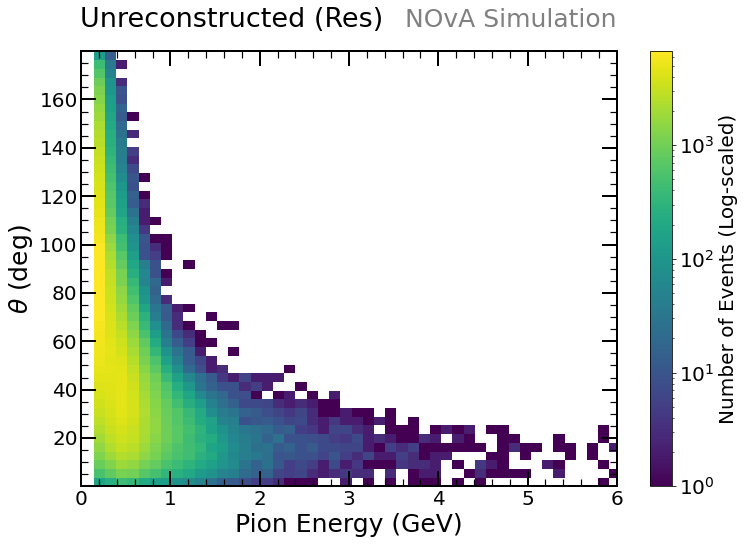

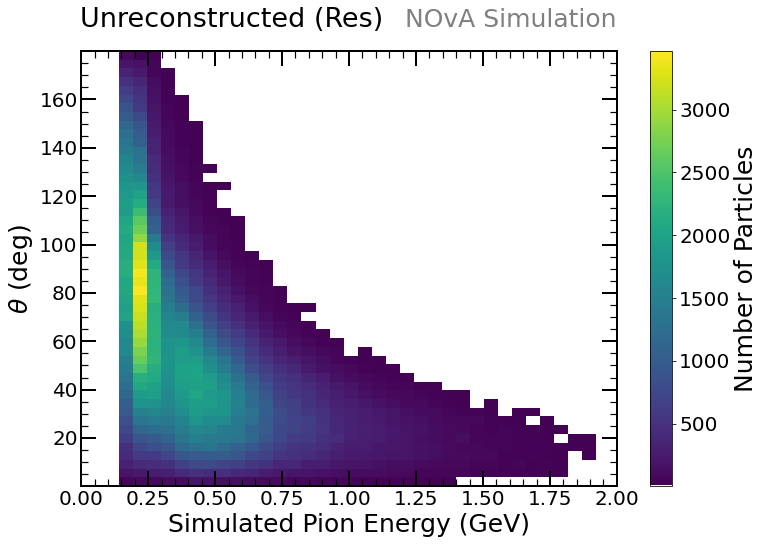

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm

# Ensure energies and theta2 are numpy arrays
energies_hb = np.array(energies)
theta_hb = np.array(theta2)

# Apply mask to energies and theta2
mask = energies_hb <= 7
energies_hb_mask = energies_hb[mask]
theta_hb_mask = theta_hb[mask]

# Create the plot
plt.figure(figsize=(12, 8))

# Create a 2D histogram with square bins and log scale
hb = plt.hist2d(energies_hb_mask, theta_hb_mask, bins=(50, 50), cmap='viridis', norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb[3])
cb.set_label('Number of Events (Log-scaled)', fontsize=20)
cb.ax.tick_params(labelsize=20)

# Set labels and title
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel(r'$\theta$ (deg)', fontsize=25)
plt.title(f'Unreconstructed ({folder})', x=0.28, y=1.042, fontsize=27)
set_plot_style()
plt.xlim(0, 6)

# Save the plot
# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_theta_part2_{folder}.png", bbox_inches='tight')

plt.show()

plt.figure(figsize=(12, 8))

# Create a 2D histogram with square bins
counts, xedges, yedges = np.histogram2d(energies_hb_mask, theta_hb_mask, bins=(120, 50))

# Define a custom colormap with white for zero counts
colors = plt.cm.viridis(np.linspace(0, 1, 256))
colors[0] = [1, 1, 1, 1]  # Set the first color to white
cmap = ListedColormap(colors)

# Create the norm
norm = mcolors.Normalize(vmin=0.1, vmax=np.max(counts))

# Plot the histogram with the custom colormap
plt.imshow(counts.T, origin='lower', cmap=cmap, norm=norm, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto')

# Add color bar
cb = plt.colorbar()
cb.set_label('Number of Particles', fontsize=25)
cb.ax.tick_params(labelsize=20)

# Set labels and title
plt.xlabel('Simulated Pion Energy (GeV)', fontsize=25)
plt.ylabel(r'$\theta$ (deg)', fontsize=25)
plt.title(f'Unreconstructed ({folder})', x=0.28, y=1.042, fontsize=27)
set_plot_style()
plt.xlim(0, 2)

# Save the plot
# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_theta_normal_part2_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/scatter_E_theta_normal_part2_{folder}.png', bbox_inches='tight')
plt.show()




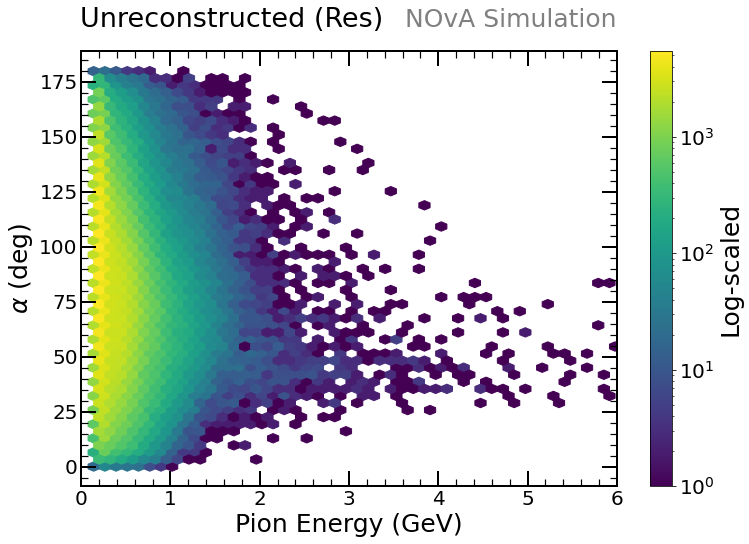

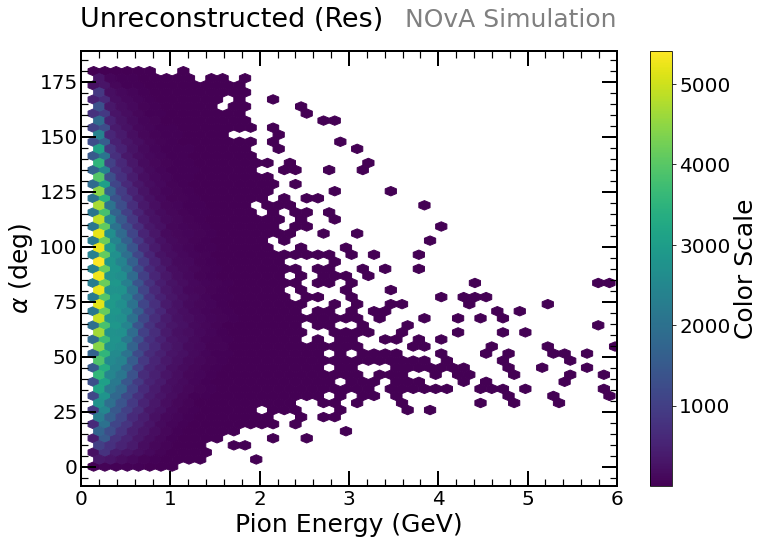

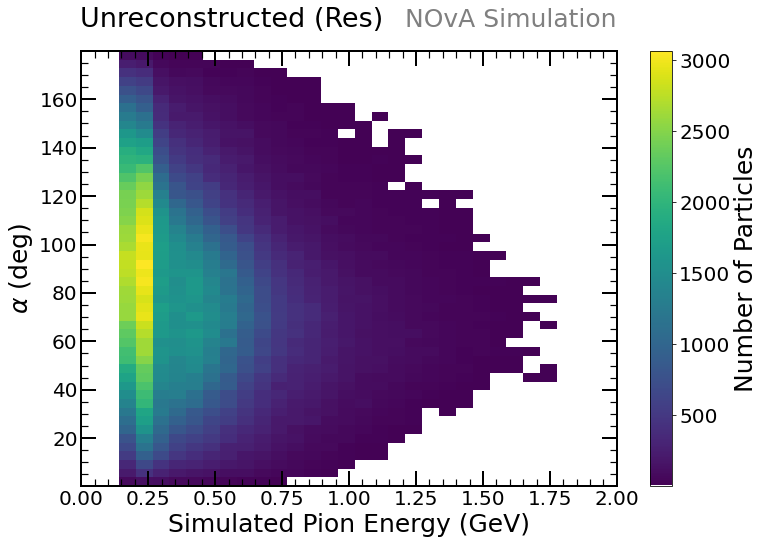

In [11]:
import matplotlib.colors as mcolors

# Ensure energies and theta2 are numpy arrays
energies_hb = np.array(energies)
alpha_hb = np.array(alpha2)

# Sample the data
# sample_size = 500000  # Sample 100,000 points
# indices = np.random.choice(len(energies_hb), sample_size, replace=False)
# sampled_energies = energies_hb[indices]
# sampled_theta2 = theta2_hb[indices]
mask = energies_hb <= 7


energies_hb_mask = energies_hb[mask]
alpha_hb_mask = alpha_hb[mask]
# Create the plot
plt.figure(figsize=(12, 8))

# Create a hexbin plot with sampled data
hb = plt.hexbin(energies_hb_mask, alpha_hb_mask, gridsize=50, cmap='viridis', mincnt=1, norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Log-scaled', fontsize=25)
cb.ax.tick_params(labelsize=20) 

# Set labels and title
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel(fr'$\alpha$ (deg)', fontsize=25)
plt.title(f'Unreconstructed ({folder})', x=0.28,y=1.042,fontsize=27)
set_plot_style()
plt.xlim(0, 6)
# plt.savefig(f"{folder}/analysisfiles/images/scatter_E_alpha_part2_{folder}.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/scatter_E_alpha_part2_{folder}.png', bbox_inches='tight')

# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_alpha_part2_{folder}.png", bbox_inches='tight')
plt.show()


plt.figure(figsize=(12, 8))

# Create a hexbin plot with sampled data
hb = plt.hexbin(energies_hb_mask, alpha_hb_mask, gridsize=50, cmap='viridis', mincnt=1)

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Color Scale', fontsize=25)
cb.ax.tick_params(labelsize=20) 

# Set labels and title
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel(fr'$\alpha$ (deg)', fontsize=25)
plt.title(f'Unreconstructed ({folder})', x=0.28,y=1.042,fontsize=27)
set_plot_style()
plt.xlim(0, 6)
# plt.savefig(f"{folder}/analysisfiles/images/scatter_E_alpha_normal_part2_{folder}.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/scatter_E_alpha_normal_part2_{folder}.png', bbox_inches='tight')

# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_alpha_normal_part2_{folder}.png", bbox_inches='tight')

plt.show()



plt.figure(figsize=(12, 8))

# Create a 2D histogram with square bins
counts, xedges, yedges = np.histogram2d(energies_hb_mask, alpha_hb_mask, bins=(100, 50))

# Define a custom colormap with white for zero counts
colors = plt.cm.viridis(np.linspace(0, 1, 256))
colors[0] = [1, 1, 1, 1]  # Set the first color to white
cmap = ListedColormap(colors)

# Create the norm
norm = mcolors.Normalize(vmin=0.1, vmax=np.max(counts))

# Plot the histogram with the custom colormap
plt.imshow(counts.T, origin='lower', cmap=cmap, norm=norm, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto')

# Add color bar
cb = plt.colorbar()
cb.set_label('Number of Particles', fontsize=25)
cb.ax.tick_params(labelsize=20)

# Set labels and title
plt.xlabel('Simulated Pion Energy (GeV)', fontsize=25)
plt.ylabel(r'$\alpha$ (deg)', fontsize=25)
plt.title(f'Unreconstructed ({folder})', x=0.28, y=1.042, fontsize=27)
set_plot_style()
plt.xlim(0, 2)

# Save the plot
# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_alpha_normal_part2_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/scatter_E_alpha_normal_part2_{folder}.png', bbox_inches='tight')
plt.show()



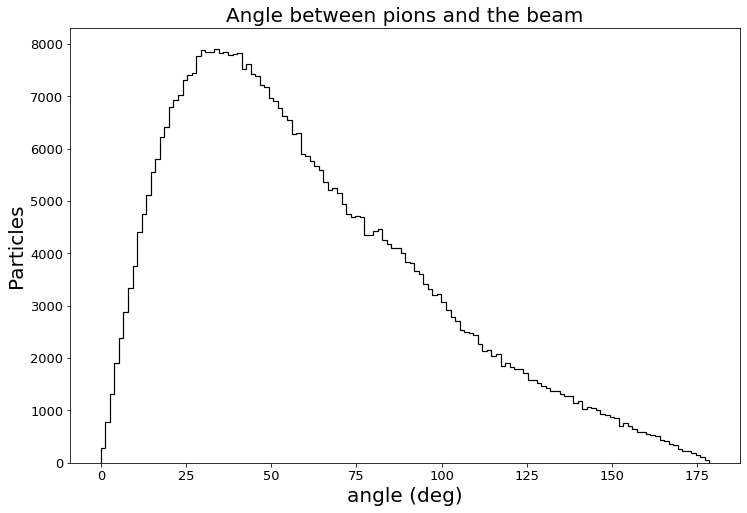

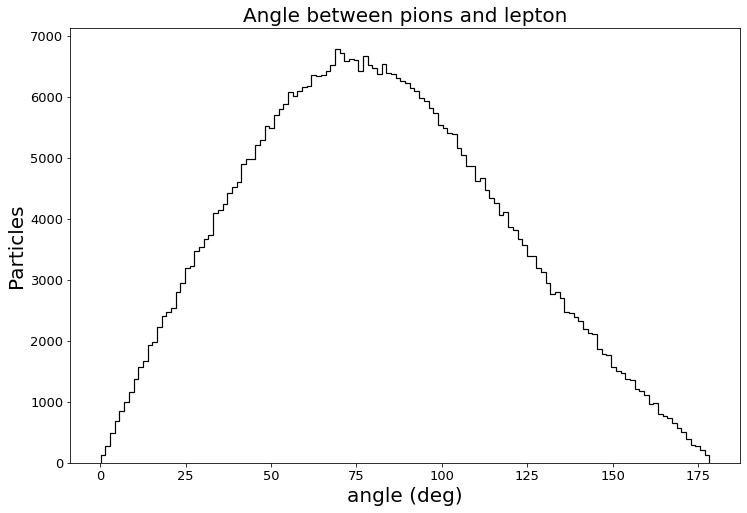

In [113]:
#bin_size = 0.025
#Theta angle
# Define histogram parameters
# data_min = np.min(theta2)
# data_max = np.max(theta2)
# hist_min = data_min - 0.5
# hist_max = data_max + 0.5

# num_bins = int((hist_max - hist_min) / bin_size)
# bin_edges = np.linspace(hist_min, hist_max, num_bins + 1)
#bin_edges = np.arange(0, 3, bin_size) 
    

plt.figure(figsize=(12, 8)) 
plt.hist(theta2, bins=autobins(theta2), edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('angle (deg)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Angle between pions and the beam', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
plt.savefig(f"{folder}/analysisfiles/images/theta_part2.png")
plt.show()


#Alpha angle
# Define histogram parameters
# data_min = np.min(alpha2)
# data_max = np.max(alpha2)
# hist_min = data_min - 0.5
# hist_max = data_max + 0.5

# num_bins = int((hist_max - hist_min) / bin_size)
# bin_edges = np.linspace(hist_min, hist_max, num_bins + 1)

plt.figure(figsize=(12, 8)) 
plt.hist(alpha2, bins=autobins(alpha2), edgecolor='black', linewidth=1.2, histtype='step')
plt.xlabel('angle (deg)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Angle between pions and lepton', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
plt.savefig(f"{folder}/analysisfiles/images/alpha_part2.png")
plt.show()

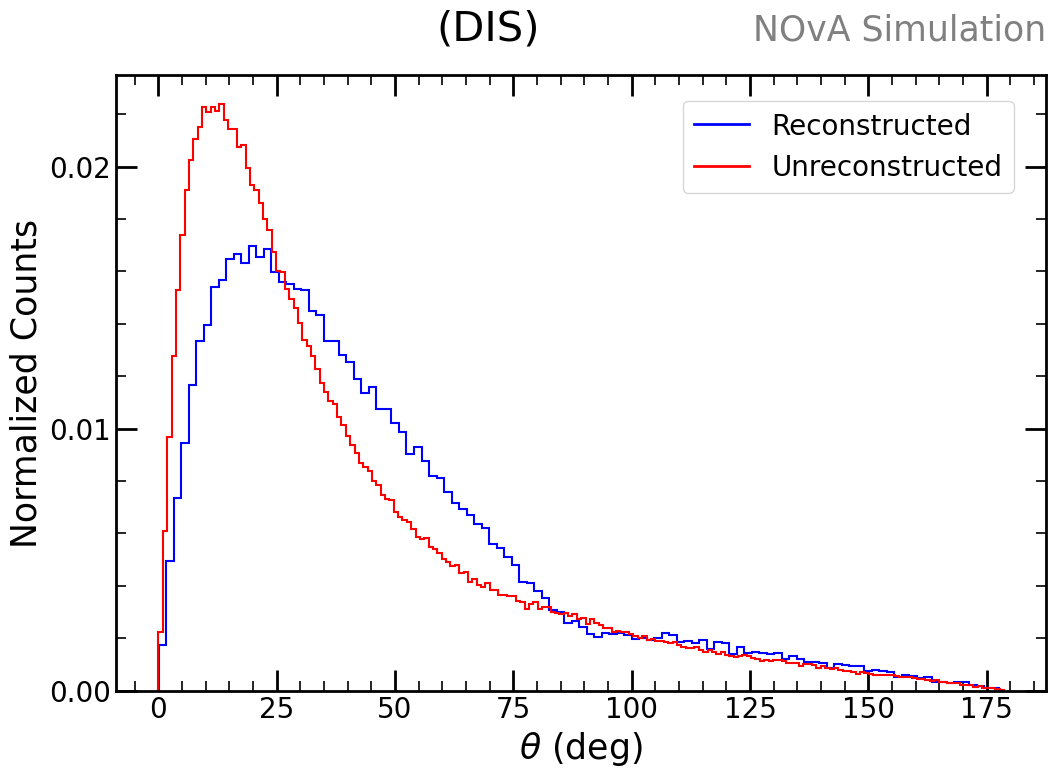

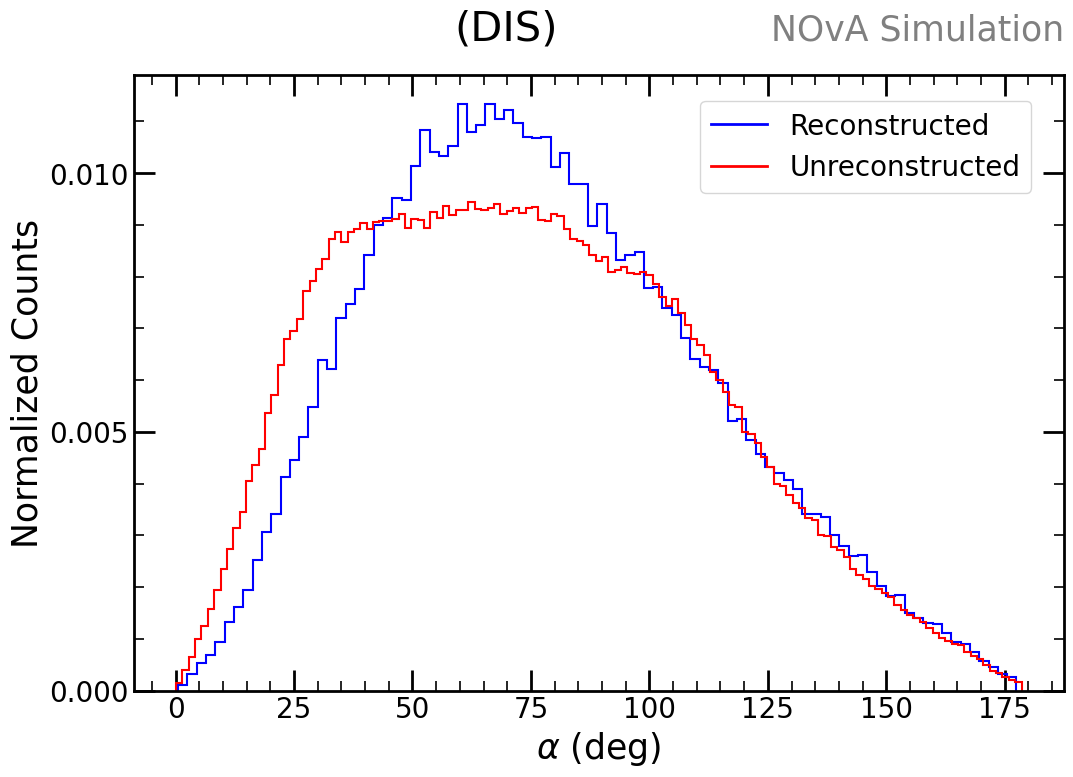

In [367]:
# Define histogram parameters
# bin_size = 0.025
# bin_edges = np.arange(0, 3.2, bin_size) 

%store -r theta
%store -r alpha

# Calculate histograms
hist_nt, _ = np.histogram(theta, bins=autobins(theta), density=True)
hist_reco, _ = np.histogram(theta2, bins=autobins(theta2), density=True)

# Plot both normalized histograms on the same plot
plt.figure(figsize=(12, 8)) 

# Plot truth energy histogram
plt.hist(theta, bins=autobins(theta), edgecolor='blue', linewidth=1.5, histtype='step', label='Reconstructed pions', density=True)

# Plot reco energy histogram
plt.hist(theta2, bins=autobins(theta2), edgecolor='red', linewidth=1.5, histtype='step', label='No reconstructed pions', density=True)

set_plot_style()
labels=['Reconstructed','Unreconstructed']
handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)]
plt.legend(handles=handles, labels=labels, fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))
#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)

plt.xlabel(fr'$\theta$ (deg)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
plt.title(f'({folder})',x=0.4,y=1.042, fontsize=30)

#plt.savefig(f"{folder}/analysisfiles/images/theta_comparison_histogram_nomralized_part1_part2.png", bbox_inches='tight')
#plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/theta_comparison_histogram_nomralized_part1_part2_{folder}.png', bbox_inches='tight')

plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/theta_comparison_histogram_nomralized_part1_part2_{folder}.png", bbox_inches='tight')

plt.show()


# Calculate histograms
hist_nt, _ = np.histogram(alpha, bins=autobins(alpha), density=True)
hist_reco, _ = np.histogram(alpha2, bins=autobins(alpha2), density=True)

# Plot both normalized histograms on the same plot
plt.figure(figsize=(12, 8)) 

# Plot truth energy histogram
plt.hist(alpha, bins=autobins(alpha), edgecolor='blue', linewidth=1.5, histtype='step', label='Reconstructed pions', density=True)

# Plot reco energy histogram
plt.hist(alpha2, bins=autobins(alpha2), edgecolor='red', linewidth=1.5, histtype='step', label='No reconstructed pions', density=True)
set_plot_style()
#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)
plt.xlabel(fr'$\alpha$ (deg)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
plt.title(f'({folder})',x=0.4,y=1.042, fontsize=30)
labels=['Reconstructed','Unreconstructed']
handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)]
plt.legend(handles=handles, labels=labels, fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))
#plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/alpha_comparison_histogram_nomralized_part1_part2_{folder}.png', bbox_inches='tight')
#plt.savefig(f"{folder}/analysisfiles/images/alpha_comparison_histogram_nomralized_part1_part2.png")

plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/alpha_comparison_histogram_nomralized_part1_part2_{folder}.png", bbox_inches='tight')

plt.show()

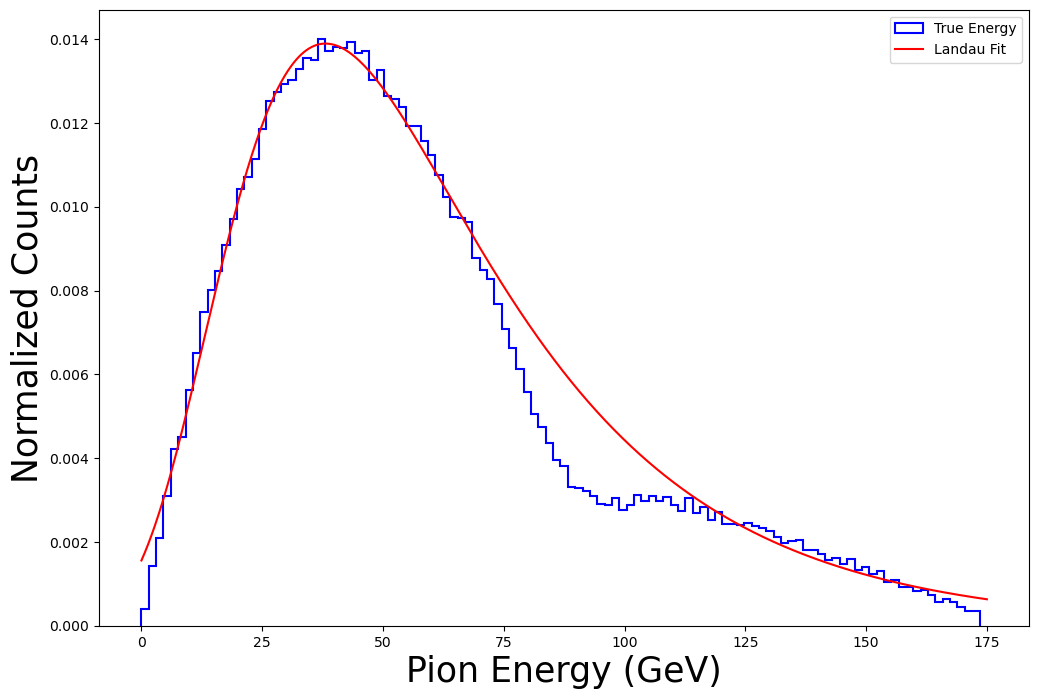

Most Probable Value (MPV): 38.092081939463554
Normalization Constant (eta): 0.436652372750782
Scale Parameter (sigma): 19.062938283941616


In [333]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import gammaincc

# Assuming epiNTshift2 is already defined with your data

def landau(x, mpv, eta, sigma):
    # Landau distribution implementation
    # mpv: most probable value
    # eta: normalization constant
    # sigma: scale parameter
    return (eta / sigma) * np.exp(-((x - mpv) / sigma + np.exp(-(x - mpv) / sigma)) / 2)


# Define the range for the Landau fit
fit_min = 2
fit_max = 73

# Plot histogram
plt.figure(figsize=(12, 8))
bins = autobins(theta, 0, 175)
counts, bin_edges, _ = plt.hist(theta, bins=bins, edgecolor='blue', linewidth=1.5, histtype='step', label='True Energy',density=True)

# Get bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Select the range for fitting
mask = (bin_centers >= fit_min) & (bin_centers <= fit_max)
fit_bin_centers = bin_centers[mask]
fit_counts = counts[mask]

# Fit Landau to the selected section of the histogram
popt, _ = curve_fit(landau, fit_bin_centers, fit_counts, p0=[(fit_min + fit_max) / 2, 1, 0.1])

# Plot Landau fit
x = np.linspace(0, 175, 1000)
plt.plot(x, landau(x, *popt), 'r-', label='Landau Fit')

plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
plt.legend()
plt.show()

# Print Landau parameters
mpv, eta, sigma = popt
print(f"Most Probable Value (MPV): {mpv}")
print(f"Normalization Constant (eta): {eta}")
print(f"Scale Parameter (sigma): {sigma}")

In [361]:
def calculate_percentages(data, thresholds):
    percentages = {}
    total = len(data)
    for threshold in thresholds:
        below_threshold = np.sum(np.array(data) < threshold)
        above_threshold = np.sum(np.array(data) >= threshold)
        percentages[threshold] = {
            'below': (below_threshold / total) * 100,
            'above': (above_threshold / total) * 100
        }
    return percentages

#aquí hay que revisar los porcentages de alpha, para Res entre 0 y 45, entre 45 y 100.
#para DIS, alpha entre 0 y 40 y entre 40 y 100
#Y para theta, en Res entre 25 y 75, (completo), entre 37 y 75 que abarca el recopico y el fin y  y entre 75 y 125
#y para dis, en theta entre 0 y 20 (recopico) y entre 25 y 80
  # Define your own thresholds

if folder=='Res':
    print(f'this is {folder}')
    thresholdsalpha = [45,100]
    percentagesalpha = calculate_percentages(alpha, thresholdsalpha)
    lenalpha=len(alpha)
    print('For alpha we got:')
    for threshold, perc in percentagesalpha.items():
        below_t=(percentagesalpha[threshold]['below']/100)*lenalpha
        print(f'Threshold {threshold}: Below {perc["below"]:.2f}%, {below_t}, Above {perc["above"]:.2f}%, {lenalpha-below_t}')

    percentagesalpha2 = calculate_percentages(alpha2, thresholdsalpha)
    lenalpha2=len(alpha2)
    print('For alpha2 we got:')
    for threshold, perc in percentagesalpha2.items():
        below_t=(percentagesalpha2[threshold]['below']/100)*lenalpha2
        print(f'Threshold {threshold}: Below {perc["below"]:.2f}%, {below_t}, Above {perc["above"]:.2f}%, {lenalpha2-below_t}')

    thresholdstheta = [25,37,75,125]
    percentagestheta = calculate_percentages(theta, thresholdstheta)
    lentheta=len(theta)
    print('For theta we got:')
    for threshold, perc in percentagestheta.items():
        below_t=(percentagestheta[threshold]['below']/100)*lentheta
        print(f'Threshold {threshold}: Below {perc["below"]:.2f}%, {below_t}, Above {perc["above"]:.2f}%, {lentheta-below_t}')

    percentagestheta2 = calculate_percentages(theta2, thresholdstheta)
    lentheta2=len(theta2)
    print('For theta2 we got:')
    for threshold, perc in percentagestheta2.items():
        below_t=(percentagestheta2[threshold]['below']/100)*lentheta2
        print(f'Threshold {threshold}: Below {perc["below"]:.2f}%, {below_t}, Above {perc["above"]:.2f}%, {lentheta2-below_t}')

if folder=='DIS':
    print(f'this is {folder}')
    thresholdsalpha = [40,100]
    percentagesalpha = calculate_percentages(alpha, thresholdsalpha)
    lenalpha=len(alpha)
    print('For alpha we got:')
    for threshold, perc in percentagesalpha.items():
        below_t=(percentagesalpha[threshold]['below']/100)*lenalpha
        print(f'Threshold {threshold}: Below {perc["below"]:.2f}%, {below_t}, Above {perc["above"]:.2f}%, {lenalpha-below_t}')

    percentagesalpha2 = calculate_percentages(alpha2, thresholdsalpha)
    lenalpha2=len(alpha2)
    print('For alpha2 we got:')
    for threshold, perc in percentagesalpha2.items():
        below_t=(percentagesalpha2[threshold]['below']/100)*lenalpha2
        print(f'Threshold {threshold}: Below {perc["below"]:.2f}%, {below_t}, Above {perc["above"]:.2f}%, {lenalpha2-below_t}')

    thresholdstheta = [20,25,80,125]
    percentagestheta = calculate_percentages(theta, thresholdstheta)
    lentheta=len(theta)
    print('For theta we got:')
    for threshold, perc in percentagestheta.items():
        below_t=(percentagestheta[threshold]['below']/100)*lentheta
        print(f'Threshold {threshold}: Below {perc["below"]:.2f}%, {below_t}, Above {perc["above"]:.2f}%, {lentheta-below_t}')

    percentagestheta2 = calculate_percentages(theta2, thresholdstheta)
    lentheta2=len(theta2)
    print('For theta2 we got:')
    for threshold, perc in percentagestheta2.items():
        below_t=(percentagestheta2[threshold]['below']/100)*lentheta2
        print(f'Threshold {threshold}: Below {perc["below"]:.2f}%, {below_t}, Above {perc["above"]:.2f}%, {lentheta2-below_t}')

    

this is DIS
For alpha we got:
Threshold 40: Below 13.97%, 18330.0, Above 86.03%, 112900.0
Threshold 100: Below 73.76%, 96789.0, Above 26.24%, 34441.0
For alpha2 we got:
Threshold 40: Below 20.50%, 120172.0, Above 79.50%, 466093.0
Threshold 100: Below 74.10%, 434446.99999999994, Above 25.90%, 151818.00000000006
For theta we got:
Threshold 20: Below 24.14%, 31675.0, Above 75.86%, 99555.0
Threshold 25: Below 32.40%, 42520.0, Above 67.60%, 88710.0
Threshold 80: Below 86.15%, 113051.0, Above 13.85%, 18179.0
Threshold 125: Below 95.93%, 125883.00000000001, Above 4.07%, 5346.999999999985
For theta2 we got:
Threshold 20: Below 36.46%, 213750.99999999997, Above 63.54%, 372514.0
Threshold 25: Below 45.49%, 266692.0, Above 54.51%, 319573.0
Threshold 80: Below 87.04%, 510265.0, Above 12.96%, 76000.0
Threshold 125: Below 96.57%, 566178.0, Above 3.43%, 20087.0


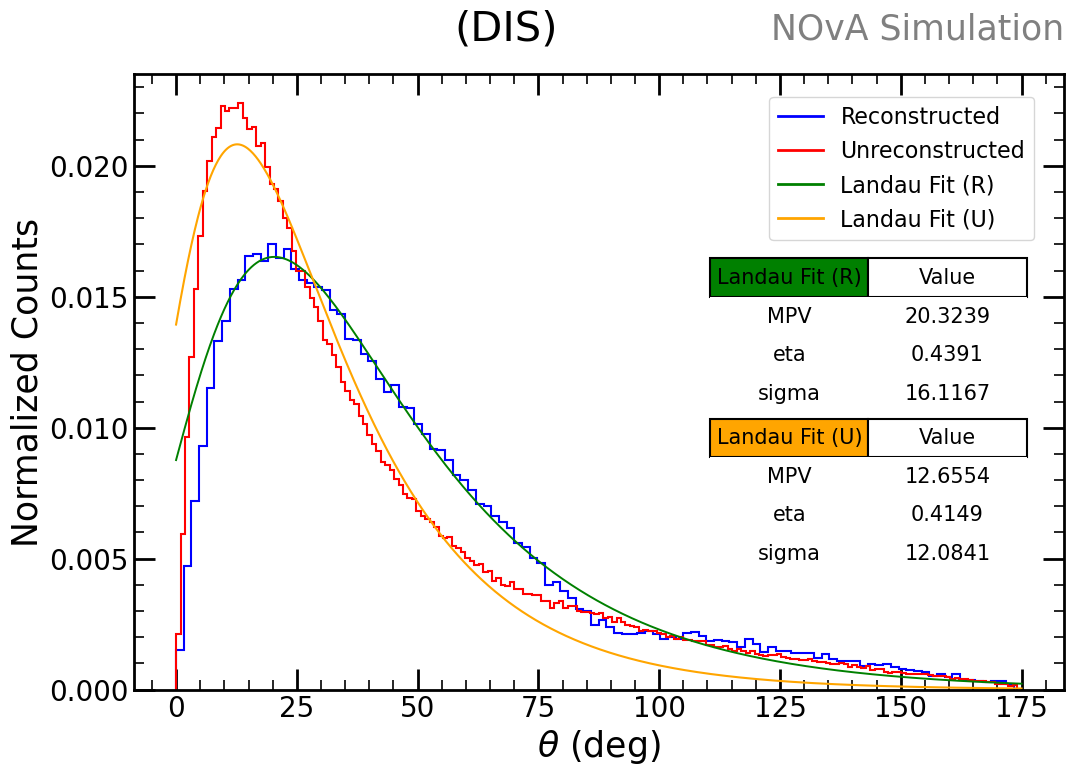

Landau Fit 1 - Most Probable Value (MPV): 20.323853440809394, Normalization Constant (eta): 0.4390691466539729, Scale Parameter (sigma): 16.116740834460046
Landau Fit 2 - Most Probable Value (MPV): 12.655418512861964, Normalization Constant (eta): 0.4148512800383644, Scale Parameter (sigma): 12.084087029626964


In [363]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.patches as mpatches

# Define Landau distribution function
def landau(x, mpv, eta, sigma):
    return (eta / sigma) * np.exp(-((x - mpv) / sigma + np.exp(-(x - mpv) / sigma)) / 2)


# Define the ranges for the Landau fits
#for Res:
#fit1_min = 2
#fit1_max = 73
#fit2_min = 2
#fit2_max = 98


#for DIS:
fit1_min = 9
fit1_max = 85
fit2_min = 3
fit2_max = 98

# Plot histogram
plt.figure(figsize=(12, 8))
bins = autobins(theta, 0, 175)
counts, bin_edges, _ = plt.hist(theta, bins=bins, edgecolor='blue', linewidth=1.5, histtype='step', label='True Energy', density=True)

# Get bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Select the ranges for fitting
mask1 = (bin_centers >= fit1_min) & (bin_centers <= fit1_max)
fit_bin_centers1 = bin_centers[mask1]
fit_counts1 = counts[mask1]

# Plot histogram
bins2 = autobins(theta2, 0, 175)
counts2, bin_edges2, _ = plt.hist(theta2, bins=bins2, edgecolor='red', linewidth=1.5, histtype='step', label='True Energy', density=True)

# Get bin centers
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2


mask2 = (bin_centers2 >= fit2_min) & (bin_centers2 <= fit2_max)
fit_bin_centers2 = bin_centers2[mask2]
fit_counts2 = counts2[mask2]

# Fit Landau to the first selected section of the histogram
popt1, _ = curve_fit(landau, fit_bin_centers1, fit_counts1, p0=[(fit1_min + fit1_max) / 2, 1, 0.1])

# Fit Landau to the second selected section of the histogram
popt2, _ = curve_fit(landau, fit_bin_centers2, fit_counts2, p0=[(fit2_min + fit2_max) / 2, 1, 0.1])

# Plot Landau fits
x = np.linspace(0, 175, 1000)
plt.plot(x, landau(x, *popt1), 'g-', linewidth=1.4,label='Landau Fit 1')
plt.plot(x, landau(x, *popt2), color='orange', label='Landau Fit 2')

# Add tables with Landau parameters
table_data1 = [
    ["MPV", f"{popt1[0]:.4f}"],
    ["eta", f"{popt1[1]:.4f}"],
    ["sigma", f"{popt1[2]:.4f}"]
]

table_data2 = [
    ["MPV", f"{popt2[0]:.4f}"],
    ["eta", f"{popt2[1]:.4f}"],
    ["sigma", f"{popt2[2]:.4f}"]
]

# Plot table for the first fit
table1 = plt.table(cellText=table_data1, colLabels=["Landau Fit (R)", "Value"], loc="upper left", cellLoc="center", bbox=[0.62, 0.45, 0.34, 0.25], colColours=["green", "white"])
table1.auto_set_font_size(False)
table1.set_fontsize(15)
for key, cell in table1.get_celld().items():
    cell.set_linewidth(0)  # Remove internal lines
    if key[0] == 0 or key[1] == -1:
        cell.set_linewidth(1.5)  # Keep outer lines

# Plot table for the second fit
table2 = plt.table(cellText=table_data2, colLabels=["Landau Fit (U)", "Value"], loc="upper right", cellLoc="center", bbox=[0.62, 0.19, 0.34, 0.25], colColours=["orange", "white"])
table2.auto_set_font_size(False)
table2.set_fontsize(15)
for key, cell in table2.get_celld().items():
    cell.set_linewidth(0)  # Remove internal lines
    if key[0] == 0 or key[1] == -1:
        cell.set_linewidth(1.5)  # Keep outer lines

plt.xlabel(fr'$\theta$ (deg)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
plt.title(f'({folder})',x=0.4,y=1.04,fontsize=30)
set_plot_style()
labels=['Reconstructed','Unreconstructed','Landau Fit (R)','Landau Fit (U)']
handles = [Line2D([0], [0], color='blue', lw=2),Line2D([0], [0], color='red', lw=2), Line2D([0], [0], color='green', lw=2), Line2D([0], [0], color='orange', lw=2)]
plt.legend(handles=handles, labels=labels, fontsize=16, loc='upper right', bbox_to_anchor=(0.98, 0.98))
#plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/theta_comparison_histogram_nomralized_with_landau_part1_part2_{folder}.png', bbox_inches='tight')
plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/theta_comparison_histogram_nomralized_with_landau_part1_part2_{folder}.png", bbox_inches='tight')
plt.show()

# Print Landau parameters
mpv1, eta1, sigma1 = popt1
mpv2, eta2, sigma2 = popt2
print(f"Landau Fit 1 - Most Probable Value (MPV): {mpv1}, Normalization Constant (eta): {eta1}, Scale Parameter (sigma): {sigma1}")
print(f"Landau Fit 2 - Most Probable Value (MPV): {mpv2}, Normalization Constant (eta): {eta2}, Scale Parameter (sigma): {sigma2}")

NameError: name 'alphas' is not defined

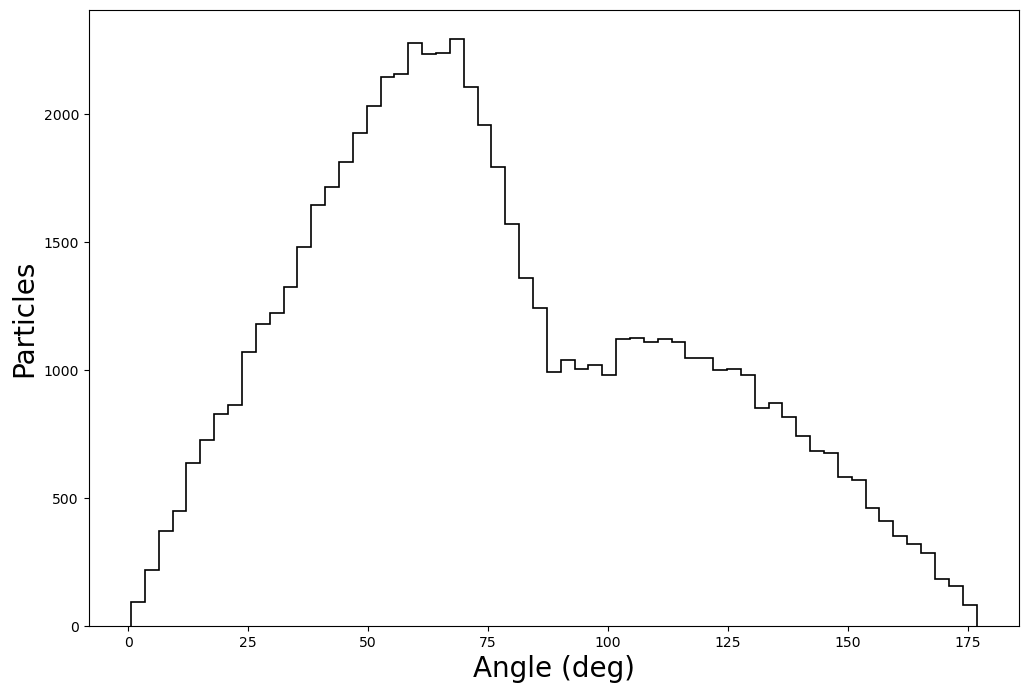

In [365]:
#FOR THE THETA ANGLE
bin_size = 0.025


for i, (start, end) in enumerate(energy_ranges):
    plt.figure(figsize=(12, 8)) 
   # data_min = np.min(alphas[i])
    #data_max = np.max(alphas[i])
#     hist_min = -1
#     hist_max = 4

#     num_bins = int((hist_max - hist_min) / bin_size)
#     bin_edges = np.linspace(hist_min, hist_max, num_bins + 1)
    
    plt.hist(thetas[i], bins=autobins(thetas[i]), edgecolor='black', linewidth=1.2, histtype='step')
    plt.xlabel('Angle (deg)', fontsize=20)
    plt.ylabel('Particles', fontsize=20)
    plt.title(f'Angle between pions and beam in energy range ({start} - {end}) GeV, total: {len(alphas[i])}', fontsize=20)
    #plt.yscale('log')
    plt.xticks(fontsize=13) 
    plt.yticks(fontsize=13)
    plt.savefig(f"{folder}/analysisfiles/images/theta_angle_Erange_{start}_to_{end}_part2.png")
    plt.show()

NameError: name 'alphas' is not defined

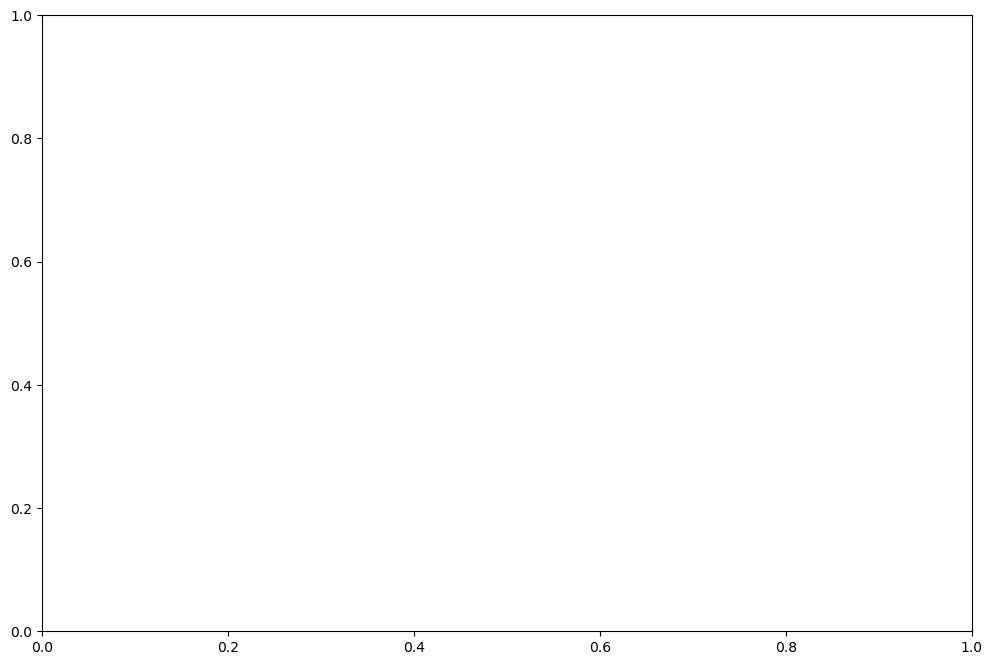

In [369]:
bin_size = 0.025
bin_edges = np.arange(0, 1, bin_size) 

# Define colors for each histogram
colors = ['green', 'blue', 'red', 'purple', 'orange']

# Create a combined histogram subplot
plt.figure(figsize=(12 , 8))
combined_subplot = plt.subplot(111)
#hist_min = -0.3
#hist_max = 3.5
#num_bins = int((hist_max - hist_min) / bin_size)
#bin_edges = np.linspace(hist_min, hist_max, num_bins + 1)

# Sort the histograms based on their size
sorted_indices = sorted(range(len(thetas)), key=lambda i: len(thetas[i]), reverse=True)
#sorted_indices=range(len(thetas))
# Plot individual normalized histograms with specified colors in sorted order
for i in sorted_indices:
    plt.hist(thetas[i], bins=autobins(thetas[i]), edgecolor='black', linewidth=1.2,histtype='stepfilled', alpha=0.7, label=f'Pion Energy ({energy_ranges[i][0]} - {energy_ranges[i][1]}) GeV. {len(alphas[i])} evts', color=colors[i])

plt.xlabel('Angle Between Pions and Beam (deg)', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.title(f'Unreconstructed ({folder})',x=0.3,y=1.042, fontsize=27)
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 0.98))
set_plot_style()
plt.savefig(f"{folder}/analysisfiles/images/theta_angles_combined_energy_ranges_part2.png")
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/theta_angles_combined_energy_ranges_part2_{folder}.png', bbox_inches='tight')
plt.show()

In [122]:
#FOR THE alpha ANGLE
bin_size = 0.025


for i, (start, end) in enumerate(energy_ranges):
    plt.figure(figsize=(12, 8)) 
   # data_min = np.min(alphas[i])
    #data_max = np.max(alphas[i])
#     hist_min = -1
#     hist_max = 4

#     num_bins = int((hist_max - hist_min) / bin_size)
#     bin_edges = np.linspace(hist_min, hist_max, num_bins + 1)
    
    plt.hist(alphas[i], bins=autobins(alphas[i]), edgecolor='black', linewidth=1.2, histtype='step')
    plt.xlabel('Angle (deg)', fontsize=20)
    plt.ylabel('Particles', fontsize=20)
    plt.title(f'Angle between pions and lepton in energy range ({start} - {end}) GeV, total: {len(alphas[i])}', fontsize=20)
    #plt.yscale('log')
    plt.xticks(fontsize=13) 
    plt.yticks(fontsize=13)
    plt.savefig(f"{folder}/analysisfiles/images/alpha_angle_Erange_{start}_to_{end}_part2.png")
    plt.show()

NameError: name 'alphas' is not defined

<Figure size 864x576 with 0 Axes>

NameError: name 'alphas' is not defined

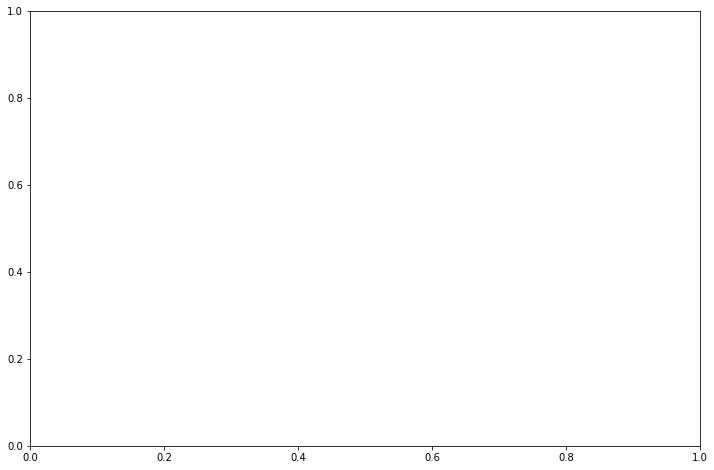

In [6]:
#bin_size = 0.025
#bin_edges = np.arange(0, 1, bin_size) 

# Define colors for each histogram
colors = ['green', 'blue', 'red', 'purple', 'orange']

# Create a combined histogram subplot
plt.figure(figsize=(12, 8))
combined_subplot = plt.subplot(111)
#hist_min = -2
#hist_max = 2
#num_bins = int((hist_max - hist_min) / bin_size)
#bin_edges = np.linspace(hist_min, hist_max, num_bins + 1)

# Sort the histograms based on their size
sorted_indices = sorted(range(len(alphas)), key=lambda i: len(alphas[i]), reverse=True)
#sorted_indices = range(len(alphas))
# Plot individual normalized histograms with specified colors in sorted order
for i in sorted_indices:
    plt.hist(alphas[i], bins=autobins(alphas[i]), edgecolor='black', linewidth=1.2, histtype='stepfilled', alpha=0.6, label=f'Pion Energy ({energy_ranges[i][0]} - {energy_ranges[i][1]}) GeV. {len(alphas[i])} evts', color=colors[i])

#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=6)
plt.xlabel('Angle Between Pions and Lepton (deg)', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.title(f'Unreconstructed ({folder})',x=0.3,y=1.042, fontsize=27)
set_plot_style()
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 0.98))
plt.savefig(f"{folder}/analysisfiles/images/alpha_angles_combined_energy_ranges_part2.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/alpha_angles_combined_energy_ranges_part2_{folder}.png', bbox_inches='tight')
plt.show()

In [124]:
folder='DIS'

In [125]:
#now I would like to do the previous graph, but checking if the energy of the most energetic proton in the event,
#has an energy above or below 0.3 GeV
start_time = time.time()
#print(len(theta))
#print(len(alpha))
Lenopi=[]
Lenopi=read_file(folder,'analysisfiles/energiesnt_perevent_nonpion_part2')
Lpdgnopi=[]
Lpdgnopi=read_file(folder,'analysisfiles/pdgs_perevent_nonpion_part2')
Lalpha=[]
Lalpha=read_file(folder,'analysisfiles/alpha_part2')
Ltheta=[]
Ltheta=read_file(folder,'analysisfiles/theta_part2')
Lepi=[]
Lepi=read_file(folder,'analysisfiles/energiesNT_part2')

alphaminus = []
alphaplus=[]
thetaminus=[]
thetaplus=[]
epiminus=[]
epiplus=[]


for x, event in enumerate(Lpdgnopi):
    high_energy = 0
    for y, element in enumerate(event):
        #if proton
        if element == '2212':
            if float(Lenopi[x][y]) > high_energy:
                high_energy = float(Lenopi[x][y])
    #here, the highest proton energy is already stored
    if high_energy < 0.3:
        #save the pi energy
        for i in range(len(Lepi[x])):
            epiminus.append(float(Lepi[x][i]))
            thetaminus.append(float(Ltheta[x][i])*(180 / math.pi))
        #now save the alpha angle
        l = len(Lalpha[x])
        num =int(l/3)-1
        mm=0
        for i in range(num):
            mm=mm+3
            vector1 = np.array([float(Lalpha[x][0]), float(Lalpha[x][1]), float(Lalpha[x][2])])
            vector2 = np.array([float(Lalpha[x][mm]), float(Lalpha[x][mm+1]), float(Lalpha[x][mm+2])])
            dot_product = np.dot(vector1, vector2)
            magnitude_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
            cosine_theta = dot_product / magnitude_product
            #save the cosine
            #alpha.append(cosine_theta)
            angle_radians = np.arccos(cosine_theta)
            degrees_angle = angle_radians * (180 / math.pi)
            #alpha.append(angle_radians)
            alphaminus.append(degrees_angle)  
    if high_energy > 0.3:
        #save the pi energy
        for i in range(len(Lepi[x])):
            epiplus.append(float(Lepi[x][i]))
            thetaplus.append(float(Ltheta[x][i])*(180 / math.pi))
        #now save the alpha angle
        l = len(Lalpha[x])
        num =int(l/3)-1
        mm=0
        for i in range(num):
            mm=mm+3
            vector1 = np.array([float(Lalpha[x][0]), float(Lalpha[x][1]), float(Lalpha[x][2])])
            vector2 = np.array([float(Lalpha[x][mm]), float(Lalpha[x][mm+1]), float(Lalpha[x][mm+2])])
            dot_product = np.dot(vector1, vector2)
            magnitude_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
            cosine_theta = dot_product / magnitude_product
            #save the cosine
            #alpha.append(cosine_theta)
            angle_radians = np.arccos(cosine_theta)
            degrees_angle = angle_radians * (180 / math.pi)
            #alpha.append(angle_radians)
            alphaplus.append(degrees_angle) 

            
#after that, lets see how is the behavior of the cvn values with respect to ranges of energy.

energy_ranges = [(0, 0.2), (0.2, 0.5), (0.5, 1), (1, 1.5), (1.5, 2)]

# Initialize a list to store filtered angles for each energy range
alphasminus = [[] for _ in range(len(energy_ranges))] 
thetasminus = [[] for _ in range(len(energy_ranges))] 
alphasplus = [[] for _ in range(len(energy_ranges))] 
thetasplus = [[] for _ in range(len(energy_ranges))] 

#fill the less 0.3GeV proton lists
for j, event in enumerate(epiminus):
    for i, (start, end) in enumerate(energy_ranges):
        if start <= event < end:
            alphasminus[i].append(alphaminus[j])
            thetasminus[i].append(thetaminus[j])

#now the other
for j, event in enumerate(epiplus):
    for i, (start, end) in enumerate(energy_ranges):
        if start <= event < end:
            alphasplus[i].append(alphaplus[j])
            thetasplus[i].append(thetaplus[j])


end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 17.86825680732727 seconds


In [ ]:
#plot the theta hists for the two energy regions of proton E
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a combined histogram subplot
plt.figure(figsize=(12, 8))
combined_subplot = plt.subplot(111)

# Sort the histograms based on their size
sorted_indices = sorted(range(len(thetasminus)), key=lambda i: len(thetasminus[i]), reverse=True)
#sorted_indices = range(len(alphas))
# Plot individual normalized histograms with specified colors in sorted order
for i in sorted_indices:
    plt.hist(thetasminus[i], bins=autobins(thetasminus[i]), edgecolor='black', linewidth=1.2, histtype='stepfilled', alpha=0.6, label=f'Pion Energy ({energy_ranges[i][0]} - {energy_ranges[i][1]}) GeV. {len(thetasminus[i])} evts', color=colors[i])

plt.xlabel('Angle Between Pions and Beam (deg)', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.title(fr'Non-Reconstructed with $E_{{\rm p}}<0.3$ GeV ({folder})',x=0.3,y=1.042, fontsize=18)
set_plot_style()
plt.legend()
plt.savefig(f"{folder}/analysisfiles/images/theta_angles_for_proton_energy_less_03_part2.png")
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/theta_angles_for_proton_energy_less_03_part2_{folder}.png', bbox_inches='tight')

plt.show()




#plot the theta hists for the two energy regions of proton E
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a combined histogram subplot
plt.figure(figsize=(12, 8))
combined_subplot = plt.subplot(111)

sorted_indices = sorted(range(len(thetasplus)), key=lambda i: len(thetasplus[i]), reverse=True)
#sorted_indices = range(len(alphas))
# Plot individual normalized histograms with specified colors in sorted order
for i in sorted_indices:
    plt.hist(thetasplus[i], bins=autobins(thetasplus[i]), edgecolor='black', linewidth=1.2, histtype='stepfilled', alpha=0.6, label=f'Pion Energy ({energy_ranges[i][0]} - {energy_ranges[i][1]}) GeV. {len(thetasplus[i])} evts', color=colors[i])

plt.xlabel('Angle Between Pions and Beam (deg)', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.title(fr'Non-Reconstructed with $E_{{\rm p}}>0.3$ GeV ({folder})',x=0.3,y=1.042, fontsize=18)
set_plot_style()
plt.legend()
plt.savefig(f"{folder}/analysisfiles/images/theta_angles_for_proton_energy_more_03_part2.png")
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/theta_angles_for_proton_energy_more_03_part2_{folder}.png', bbox_inches='tight')

plt.show()

In [ ]:
#plot the alpha hists for the two energy regions of proton E
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a combined histogram subplot
plt.figure(figsize=(12, 8))
combined_subplot = plt.subplot(111)

# Sort the histograms based on their size
sorted_indices = sorted(range(len(alphasminus)), key=lambda i: len(alphasminus[i]), reverse=True)

# Plot individual normalized histograms with specified colors
for i in sorted_indices:
    plt.hist(alphasminus[i], bins=autobins(alphasminus[i]), edgecolor='black', linewidth=1.2, histtype='stepfilled', alpha=0.7, label=f'Pion Energy ({energy_ranges[i][0]} - {energy_ranges[i][1]}) GeV. {len(alphasminus[i])} evts', color=colors[i])

plt.xlabel('Angle Between Pions and Lepton (deg)', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
set_plot_style()
plt.legend()
plt.title(fr'Reconstructed with $E_{{\rm p}}<0.3$ GeV ({folder})',x=0.3,y=1.042, fontsize=18)
plt.savefig(f"{folder}/analysisfiles/images/alpha_angles_for_proton_energy_less_03_part2.png")
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/alpha_angles_for_proton_energy_less_03_part2_{folder}.png', bbox_inches='tight')

plt.show()




#plot the theta hists for the two energy regions of proton E
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a combined histogram subplot
plt.figure(figsize=(12, 8))
combined_subplot = plt.subplot(111)

# Sort the histograms based on their size
sorted_indices = sorted(range(len(alphasplus)), key=lambda i: len(alphasplus[i]), reverse=True)

# Plot individual normalized histograms with specified colors
for i in sorted_indices:
    plt.hist(alphasplus[i], bins=autobins(alphasplus[i]), edgecolor='black', linewidth=1.2, histtype='stepfilled', alpha=0.7, label=f'Pion Energy ({energy_ranges[i][0]} - {energy_ranges[i][1]}) GeV. {len(alphasplus[i])} evts', color=colors[i])

plt.xlabel('Angle Between Pions and Lepton (deg)', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
set_plot_style()
plt.legend()
plt.title(fr'Reconstructed with $E_{{\rm p}}>0.3$ GeV ({folder})',x=0.3,y=1.042, fontsize=18)
plt.savefig(f"{folder}/analysisfiles/images/alpha_angles_for_proton_energy_more_03_part2.png")
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/alpha_angles_for_proton_energy_more_03_part2_{folder}.png', bbox_inches='tight')

plt.show()

In [ ]:
#here we check the dependence of number of true primary particles in event for events with only one pion. NONRECONSTRUCTED 
start_time = time.time()
Lalpha=[]
Lalpha=read_file(folder,'analysisfiles/alpha_part2')
Ltheta=[]
Ltheta=read_file(folder,'analysisfiles/theta_part2')
Lpdgsreco=[]
Lpdgsreco=read_file2(folder,'analysisfiles/allpdgnt_part2')

alphas_per_PP = [[] for _ in range(9)] 
thetas_per_PP = [[] for _ in range(9)] 


for i, event in enumerate(Lpdgsreco):
    npions=0
    for element in event:
        if element == '211' or element == '-211':
            npions=npions +1
    if npions == 1:
        length=len(event)
        if length < 9:
            thetas_per_PP[length].append(float(Ltheta[i][0]))
            
            vector1 = np.array([float(Lalpha[i][0]), float(Lalpha[i][1]), float(Lalpha[i][2])])
            vector2 = np.array([float(Lalpha[i][3]), float(Lalpha[i][4]), float(Lalpha[i][5])])
            dot_product = np.dot(vector1, vector2)
            magnitude_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
            cosine_theta = dot_product / magnitude_product
            #save the cosine
            #alpha.append(cosine_theta)
            angle_radians = np.arccos(cosine_theta)
            degrees_angle = angle_radians * (180 / math.pi)
            #alpha.append(angle_radians)
            alphas_per_PP[length].append(degrees_angle) 
            
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [ ]:
plt.figure(figsize=(12, 8))  
for i in range(len(thetas_per_PP)):
    if len(thetas_per_PP[i]) !=0:
        plt.hist(thetas_per_PP[i], bins=autobins(thetas_per_PP[i]), linewidth=1.2, histtype='step',label=f'{i}', density=True)
plt.xlabel('Angle (deg)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
#plt.title(f'Angle between pions and beam in energy range ({start} - {end}) GeV, total: {len(alphas[i])}', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
plt.legend()
#plt.savefig(f"{folder}/analysisfiles/images/theta_angle_Erange_{start}_to_{end}_part1.png")
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))  
for i in range(len(alphas_per_PP)):
    if len(alphas_per_PP[i]) !=0:
        plt.hist(alphas_per_PP[i], bins=autobins(alphas_per_PP[i]), linewidth=1.2, histtype='step',label=f'{i}',density=True)
plt.xlabel('Angle (deg)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
#plt.title(f'Angle between pions and beam in energy range ({start} - {end}) GeV, total: {len(alphas[i])}', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
plt.legend()
#plt.savefig(f"{folder}/analysisfiles/images/theta_angle_Erange_{start}_to_{end}_part1.png")
plt.show()

In [ ]:
#Check the plot angle vs energy for the energy regions already defined
start_time = time.time()

temp=[]
energies=[]
temp=read_file(folder, 'analysisfiles/energiesNT_part2')
energies = [float(element) for sublist in temp for element in sublist] 

alphaminus = []
alphaplus=[]
thetaminus=[]
thetaplus=[]
epiminus=[]
epiplus=[]

            
#after that, lets see how is the behavior of the cvn values with respect to ranges of energy.

energy_ranges = [(0, 0.2), (0.2, 0.5), (0.5, 1), (1, 1.5), (1.5, 2)]

# Initialize a list to store filtered angles for each energy range
alphasE = [[] for _ in range(len(energy_ranges))] 
thetasE = [[] for _ in range(len(energy_ranges))] 
energiesE = [[] for _ in range(len(energy_ranges))] 

#fill the less 0.3GeV proton lists
for j, event in enumerate(energies):
    for i, (start, end) in enumerate(energy_ranges):
        if start <= event < end:
            alphasE[i].append(alpha2[j])
            thetasE[i].append(theta2[j])
            energiesE[i].append(energies[j])

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [ ]:
#plot the thetas
for i, (start, end) in enumerate(energy_ranges):
    plt.figure(figsize=(12, 8)) 
    plt.scatter(thetasE[i], energiesE[i], color='blue', marker='.', s=100, alpha=0.5)
    plt.xlabel('Angle (deg)',fontsize=20)
    plt.ylabel('Pion energy (GeV)',fontsize=20)
    plt.title(f'Unidentified pion energy vs angle between pions and beam, for energy range ({start} - {end}) GeV',fontsize=20)
    plt.xticks(fontsize=13) 
    plt.yticks(fontsize=13)
    #plt.xlim(0,4)
    plt.savefig(f"{folder}/analysisfiles/images/scatter_pion_energy_angle_theta_energy_range_{start}_{end}_part2.png")
    plt.show()

In [116]:
#plot the alphas
for i, (start, end) in enumerate(energy_ranges):
    plt.figure(figsize=(12, 8))  
    plt.scatter(alphasE[i], energiesE[i], color='blue', marker='.', s=100, alpha=0.5)
    plt.xlabel('Angle (deg)',fontsize=20)
    plt.ylabel('Pion energy (GeV)',fontsize=20)
    plt.title(f'Unidentified pion energy vs angle between pions and lepton, for energy range ({start} - {end}) GeV',fontsize=20)
    plt.xticks(fontsize=13) 
    plt.yticks(fontsize=13)
    #plt.xlim(0,4)
    plt.savefig(f"{folder}/analysisfiles/images/scatter_pion_energy_angle_alpha_energy_range_{start}_{end}_part2.png")
    plt.show()

NameError: name 'alphasE' is not defined

<Figure size 864x576 with 0 Axes>

In [117]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Assuming numpiR and numpint are defined earlier

# Create the confusion matrix
confusion = confusion_matrix(numpiR, numpint)

# Filter out columns for numbers 1, 2, 3, and 4
relevant_indices_reco = [0, 1, 2, 3]
relevant_indices_true = [1, 2, 3, 4]  # Exclude 0
confusion_relevant = confusion[relevant_indices_reco][:, relevant_indices_true]

# Calculate the percentage per column
col_sums = confusion_relevant.sum(axis=0)
confusion_percentage_per_column = confusion_relevant / col_sums * 100

# Plot the matrix with improved formatting
plt.figure(figsize=(10, 8))

# Plot raw numbers
sns.heatmap(confusion_relevant, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["1", "2", "3", "4"],  # Adjusted indices
            yticklabels=["0", "1", "2", "3"],  # Keep zero in the rows
            annot_kws={"fontsize": 20})

# Add percentage values on top of the numbers
for i in range(len(confusion_relevant)):
    for j in range(len(relevant_indices_true)):
        plt.text(j + 0.5, i + 0.4, f"\n({confusion_percentage_per_column[i, j]:.2f}%)",
                 ha="center", va="center", color="red", fontsize=20)  # Adjust font size
plt.gca().invert_yaxis()
plt.xlabel("True number of pions", fontsize=30)
plt.ylabel("Reco number of pions", fontsize=30)
# Set tick font size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title(f"Number of True vs Reco pions ({folder})", fontsize=30)

# Change the width of the frame surrounding the plot
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Adjust the linewidth as needed

# Save and show plot
plt.show()


NameError: name 'numpiR' is not defined